In [1]:
# import the different libraries 
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os # change the working directory 
os.chdir('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/Foundations of Data Science/Group Project/swiss-hospitals/code')

In [3]:
# get the working directory 
current_directory = os.getcwd()
print(current_directory)

/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/Foundations of Data Science/Group Project/swiss-hospitals/code


In [4]:
############## R E L E V A N T   C O D E
# load the data 
warnings.filterwarnings("ignore")
data = pd.read_csv('../data/kzp-2008-2020-timeseries.csv', encoding="ISO-8859-1")
df=data
df3=data
df5=data
df7=data
missing_values_df = pd.DataFrame(columns=['year', 'count'] + list(df.columns))

#create df with most possible non 0 columns per year
# Loop through each year in the 'JAHR' column
for year in df['JAHR'].unique():
    year_df = df[df['JAHR'] == year]
    count = len(year_df)
    #count missing values
    missing_values = year_df.isnull().sum()
    # amount of non missing values
    non_missing_values = count - missing_values
    #adding count
    missing_values_df = missing_values_df.append({'year': year, 'count': count, **non_missing_values}, ignore_index=True)

years = [2014, 2015, 2016, 2017, 2018, 2019, 2020] #years to keep
cols = []
for var in years:
    df_year = missing_values_df[missing_values_df['year'] == var] # only want specified years
    cols.extend([col for col in df_year.columns if (df_year[col] == 0).any()]) # add col names where value=0 to list
cols_to_remove = list(set(cols)) # reduce the list to only include unique values
#print(cols_to_remove)
for var in cols_to_remove:
    if var in df.columns:
        df=df.drop(var, axis=1)
        #print(var,",was dropped")
years_to_drop=[2013,2012,2011,2010,2009,2008]

df=df.drop(df[df['JAHR'].isin(years_to_drop)].index)
df2=df
#onehot encode certain variables
df["Akt"]=df['Akt'].astype('string')
df["Akt"]=df['Akt'].str.split(', ')
Akt_dummies = pd.get_dummies(df['Akt'].explode())
Akt_dummies= Akt_dummies.groupby(level=0).sum()
Akt_dummies.columns= 'Akt_' + Akt_dummies.columns
#print(Akt_dummies)


df["SL"]=df["SL"].fillna("none")
df["SL"]=df['SL'].astype('string')
df["SL"]=df['SL'].str.split(', ')
SL_dummies = pd.get_dummies(df['SL'].explode())
SL_dummies= SL_dummies.groupby(level=0).sum()
SL_dummies=SL_dummies.drop("none", axis=1)
SL_dummies.columns= 'SL_' + SL_dummies.columns
#print(SL_dummies)


df["SA"]=df["SA"].fillna("none")
df["SA"]=df['SA'].astype('string')
df["SA"]=df['SA'].str.split(', ')
SA_dummies = pd.get_dummies(df['SA'].explode())
SA_dummies= SA_dummies.groupby(level=0).sum()
SA_dummies=SA_dummies.drop("none", axis=1)
SA_dummies.columns= 'SA_' + SA_dummies.columns
#print(SA_dummies)

df["WB"]=df["WB"].fillna("none")
df["WB"]=df['WB'].astype('string')
df["WB"]=df['WB'].str.split(', ')
WB_dummies = pd.get_dummies(df['WB'].explode())
WB_dummies= WB_dummies.groupby(level=0).sum()
WB_dummies=WB_dummies.drop("none", axis=1)
WB_dummies.columns= 'WB_' + WB_dummies.columns

DF = pd.concat([df2, Akt_dummies, SL_dummies, SA_dummies, WB_dummies], axis=1)
DF=DF.drop(['SA','SL','Akt','Unnamed: 0','WB'], axis=1)
print(DF.columns)
DF[['Typ', 'KT', 'Ort', 'RForm']]=df[['Typ', 'KT', 'Ort', 'RForm']].astype('category')
DF['JAHR']=DF['JAHR'].astype(CategoricalDtype(categories=[2014, 2015, 2016, 2017, 2018, 2019, 2020],ordered=True))

Index(['JAHR', 'KT', 'Inst', 'Adr', 'Ort', 'Typ', 'AnzStand', 'RForm',
       'PtageStatMST', 'AustStatMST',
       ...
       'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET',
       'WB_Arzt', 'WB_BGs', 'WB_MSt'],
      dtype='object', length=118)


In [5]:
#Just intended for visualisation of the amount of missing values

from IPython.display import HTML

# Define a custom CSS style to make tables horizontally scrollable
css_style = """
<style>
    table.dataframe {
        display: block;
        overflow-x: auto;
    }
</style>
"""

HTML(css_style)




#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Create an empty DataFrame to store the results
missing_values_df = pd.DataFrame(columns=['year', 'count'] + list(DF.columns))

# Loop through each year in the 'year' column
for year in DF['JAHR'].unique():
    # Select the rows for the current year
    year_df = DF[DF['JAHR'] == year]
    # Count the number of entries for the current year
    count = len(year_df)
    # Count the number of missing values in each column
    missing_values = year_df.isnull().sum()
    # Add a row to the results DataFrame
    missing_values_df = missing_values_df.append({'year': year, 'count': count, **missing_values}, ignore_index=True)

# Set the 'year' column as the index
#missing_values_df.set_index('year', inplace=True)

# Display the results
#print(missing_values_df)
missing_values_df
#anzahl missing values pro zeile; optimum ist 0

year count JAHR KT Inst Adr Ort Typ AnzStand RForm  ... SA_CC SA_CT SA_Dia  \
0  2014   289    0  0    0  16   0   0        0     0  ...     0     0      0   
1  2015   288    0  0    0  13   0   0        0     0  ...     0     0      0   
2  2016   283    0  0    0  10   0   0        0     0  ...     0     0      0   
3  2017   281    0  0    0   9   0   0        0     0  ...     0     0      0   
4  2018   281    0  0    0   9   0   0        0     0  ...     0     0      0   
5  2019   281    0  0    0   8   0   0        0     0  ...     0     0      0   
6  2020   276    0  0    0   5   0   0        0     0  ...     0     0      0   

  SA_LB SA_Lito SA_MRI SA_PET WB_Arzt WB_BGs WB_MSt  
0     0       0      0      0       0      0      0  
1     0       0      0      0       0      0      0  
2     0       0      0      0       0      0      0  
3     0       0      0      0       0      0      0  
4     0       0      0      0       0      0      0  
5     0       0      0      0       0      0      0  
6     0       0      0      0       0      0      0  

[7 rows x 120 columns]

In [6]:
#visualisation

#columns = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
#other_columns = [col for col in DF.columns if col not in columns]
#years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
#
#result = pd.DataFrame(columns=['combination', 'year'] + other_columns)
#for column in columns:
#    for year in years:
#        mask = (DF[column] == 1) & (DF['JAHR'] == year)
#        missing_values = DF.loc[mask, other_columns].isnull().sum()
#        result = result.append({'combination': column, 'year': year, **missing_values}, ignore_index=True)
#
#result = result.set_index(['combination', 'year'])
#result

JAHR KT Inst Adr Ort Typ AnzStand RForm PtageStatMST  \
combination year                                                        
Akt_A       2014    0  0    0   8   0   0        0     0            0   
            2015    0  0    0   7   0   0        0     0            0   
            2016    0  0    0   4   0   0        0     0            0   
            2017    0  0    0   4   0   0        0     0            1   
            2018    0  0    0   4   0   0        0     0            3   
            2019    0  0    0   4   0   0        0     0            1   
            2020    0  0    0   3   0   0        0     0            1   
Akt_B       2014    0  0    0   0   0   0        0     0            4   
            2015    0  0    0   0   0   0        0     0            4   
            2016    0  0    0   0   0   0        0     0            0   
            2017    0  0    0   0   0   0        0     0            0   
            2018    0  0    0   0   0   0        0     0            0   
            2019    0  0    0   0   0   0        0     0            1   
            2020    0  0    0   0   0   0        0     0            1   
Akt_P       2014    0  0    0   7   0   0        0     0            0   
            2015    0  0    0   7   0   0        0     0            0   
            2016    0  0    0   7   0   0        0     0            0   
            2017    0  0    0   6   0   0        0     0            0   
            2018    0  0    0   6   0   0        0     0            0   
            2019    0  0    0   5   0   0        0     0            0   
            2020    0  0    0   4   0   0        0     0            0   
Akt_R       2014    0  0    0   4   0   0        0     0            1   
            2015    0  0    0   3   0   0        0     0            0   
            2016    0  0    0   3   0   0        0     0            0   
            2017    0  0    0   4   0   0        0     0            0   
            2018    0  0    0   4   0   0        0     0            0   
            2019    0  0    0   3   0   0        0     0            2   
            2020    0  0    0   1   0   0        0     0            0   

                 AustStatMST  ... SA_CC SA_CT SA_Dia SA_LB SA_Lito SA_MRI  \
combination year              ...                                           
Akt_A       2014           0  ...     0     0      0     0       0      0   
            2015           0  ...     0     0      0     0       0      0   
            2016           0  ...     0     0      0     0       0      0   
            2017           1  ...     0     0      0     0       0      0   
            2018           3  ...     0     0      0     0       0      0   
            2019           1  ...     0     0      0     0       0      0   
            2020           1  ...     0     0      0     0       0      0   
Akt_B       2014           4  ...     0     0      0     0       0      0   
            2015           4  ...     0     0      0     0       0      0   
            2016           0  ...     0     0      0     0       0      0   
            2017           0  ...     0     0      0     0       0      0   
            2018           0  ...     0     0      0     0       0      0   
            2019           1  ...     0     0      0     0       0      0   
            2020           1  ...     0     0      0     0       0      0   
Akt_P       2014           0  ...     0     0      0     0       0      0   
            2015           0  ...     0     0      0     0       0      0   
            2016           0  ...     0     0      0     0       0      0   
            2017           0  ...     0     0      0     0       0      0   
            2018           0  ...     0     0      0     0       0      0   
            2019           0  ...     0     0      0     0       0      0   
            2020           0  ...     0     0      0     0       0      0   
Akt_R       2014           1  ...     0     0      0   

In [7]:
# just visualisation
#columns = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
#other_columns = [col for col in DF.columns if col not in columns]
#years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

#result = pd.DataFrame(columns=['combination', 'year', 'max_values'] + other_columns)
#for column in columns:
#    for year in years:
#        mask = (DF[column] == 1) & (DF['JAHR'] == year)
#        max_values = mask.sum()
#        missing_values = DF.loc[mask, other_columns].isnull().sum()
#       result = result.append({'combination': column, 'year': year, 'max_values': max_values, **missing_values}, ignore_index=True)

#result = result.set_index(['combination', 'year'])
#result

max_values JAHR KT Inst Adr Ort Typ AnzStand RForm  \
combination year                                                      
Akt_A       2014        169    0  0    0   8   0   0        0     0   
            2015        170    0  0    0   7   0   0        0     0   
            2016        166    0  0    0   4   0   0        0     0   
            2017        165    0  0    0   4   0   0        0     0   
            2018        165    0  0    0   4   0   0        0     0   
            2019        166    0  0    0   4   0   0        0     0   
            2020        168    0  0    0   3   0   0        0     0   
Akt_B       2014         18    0  0    0   0   0   0        0     0   
            2015         18    0  0    0   0   0   0        0     0   
            2016         14    0  0    0   0   0   0        0     0   
            2017         15    0  0    0   0   0   0        0     0   
            2018         15    0  0    0   0   0   0        0     0   
            2019         17    0  0    0   0   0   0        0     0   
            2020         15    0  0    0   0   0   0        0     0   
Akt_P       2014         76    0  0    0   7   0   0        0     0   
            2015         76    0  0    0   7   0   0        0     0   
            2016         77    0  0    0   7   0   0        0     0   
            2017         76    0  0    0   6   0   0        0     0   
            2018         78    0  0    0   6   0   0        0     0   
            2019         76    0  0    0   5   0   0        0     0   
            2020         76    0  0    0   4   0   0        0     0   
Akt_R       2014         93    0  0    0   4   0   0        0     0   
            2015         94    0  0    0   3   0   0        0     0   
            2016         96    0  0    0   3   0   0        0     0   
            2017         96    0  0    0   4   0   0        0     0   
            2018         95    0  0    0   4   0   0        0     0   
            2019         93    0  0    0   3   0   0        0     0   
            2020         88    0  0    0   1   0   0        0     0   

                 PtageStatMST  ... SA_CC SA_CT SA_Dia SA_LB SA_Lito SA_MRI  \
combination year               ...                                           
Akt_A       2014            0  ...     0     0      0     0       0      0   
            2015            0  ...     0     0      0     0       0      0   
            2016            0  ...     0     0      0     0       0      0   
            2017            1  ...     0     0      0     0       0      0   
            2018            3  ...     0     0      0     0       0      0   
            2019            1  ...     0     0      0     0       0      0   
            2020            1  ...     0     0      0     0       0      0   
Akt_B       2014            4  ...     0     0      0     0       0      0   
            2015            4  ...     0     0      0     0       0      0   
            2016            0  ...     0     0      0     0       0      0   
            2017            0  ...     0     0      0     0       0      0   
            2018            0  ...     0     0      0     0       0      0   
            2019            1  ...     0     0      0     0       0      0   
            2020            1  ...     0     0      0     0       0      0   
Akt_P       2014            0  ...     0     0      0     0       0      0   
            2015            0  ...     0     0      0     0       0      0   
            2016            0  ...     0     0      0     0       0      0   
            2017            0  ...     0     0      0     0       0      0   
            2018            0  ...     0     0      0     0       0      0   
            2019            0  ...     0     0      0     0       0      0   
            2020            0  ...     0     0      0     0       0      0   
Akt_R       2014            1  ...     0     0      0     0       0      0   
            20

In [8]:
# just more visualisation 
#pd.DataFrame(DF.groupby(['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']).size(), columns=['Count']).reset_index()

Akt_A  Akt_B  Akt_P  Akt_R  Count
0      0      0      0      1    339
1      0      0      1      0    325
2      0      0      1      1     34
3      0      1      0      0    112
4      1      0      0      0    792
5      1      0      0      1    201
6      1      0      1      0     95
7      1      0      1      1     81

In [9]:
############## R E L E V A N T   C O D E
#this code replaces missing values per measured metric, if there is a measurement in the same metric, but in a different category(meaning a different suffix)

list_of_fixable = ['PtageStatMS', 'AustStatMS', 'BettenStat', 'DADStatMS', 'KostAmb', 'KostOKPAmb', 'KostStat', 'KostKVGStat', 'AnlKVGStat', 'KostZvOKPStat', 'AnlZvOKPStat', 'ErlOKPAmb', 'ErlKVGStat']
list_of_bools = ['Akt_A', 'Akt_B', 'Akt_P', 'Akt_R']
list_of_fixable_A = [element + 'A' for element in list_of_fixable]
list_of_fixable_P = [element + 'P' for element in list_of_fixable]
list_of_fixable_R = [element + 'R' for element in list_of_fixable]
list_of_fixable_B = [element + 'A' for element in list_of_fixable]
matrix_with_indices = np.zeros((len(DF), len(list_of_fixable)))
for var in range(len(list_of_fixable)):
    for i in range(len(DF)):
        if DF['Akt_A'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_A[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        elif DF['Akt_P'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_P[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        elif DF['Akt_R'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_R[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        elif DF['Akt_B'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_B[var]][i+1819]):
            matrix_with_indices[i,var] += 1
        if not ((DF['Akt_A'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_A[var]][i+1819])) or (DF['Akt_P'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_P[var]][i+1819])) or (DF['Akt_R'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_R[var]][i+1819])) or (DF['Akt_B'][i+1819] == 1 and pd.notnull(DF[list_of_fixable_B[var]][i+1819]))):
            matrix_with_indices[i,var] -= 0
np.set_printoptions(threshold=np.inf)
print(matrix_with_indices)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [10]:
############## R E L E V A N T   C O D E
#this code replaces missing values per measured metric, if there is a measurement in the same metric, but in a different category(meaning a different suffix)(step2)


for var in range(len(list_of_fixable)):
    for i in range(len(DF)):
        if matrix_with_indices[i,var] == 1:
            if pd.isnull(DF.loc[i+1819, list_of_fixable_A[var]]):
                DF.loc[i+1819, list_of_fixable_A[var]] = 0
            if pd.isnull(DF.loc[i+1819, list_of_fixable_P[var]]):
                DF.loc[i+1819, list_of_fixable_P[var]] = 0
            if pd.isnull(DF.loc[i+1819, list_of_fixable_R[var]]):
                DF.loc[i+1819, list_of_fixable_R[var]] = 0
            if pd.isnull(DF.loc[i+1819, list_of_fixable_B[var]]):
                DF.loc[i+1819, list_of_fixable_B[var]] = 0
DF.head(15)

JAHR  KT                                               Inst  \
1819  2014  AG                             Kantonsspital Aarau AG   
1820  2014  AG                             Kantonsspital Baden AG   
1821  2014  AG                            Hirslanden Klinik Aarau   
1822  2014  AG                        Gesundheitszentrum Fricktal   
1823  2014  AG                        Kreisspital für das Freiamt   
1824  2014  AG                                 Spital Zofingen AG   
1825  2014  AG                    Asana Gruppe AG Spital Leuggern   
1826  2014  AG                    Asana Gruppe AG Spital Menziken   
1827  2014  AG                            Klinik Villa im Park AG   
1828  2014  AG                   Psychiatrische Dienste Aargau AG   
1829  2014  AG      Schützen Rheinfelden AG Klinik & Ambulatorium   
1830  2014  AG                                 Klinik Im Hasel AG   
1831  2014  AG  Klinik für Suchtmedizin KSM Drogenentzug / Übe...   
1832  2014  AG                                 RehaClinic Zurzach   
1833  2014  AG                                   Reha Rheinfelden   

                      Adr                Ort   Typ  AnzStand RForm  \
1819       Tellstrasse 15         5000 Aarau  K112       1.0    R1   
1820             Im Ergel         5404 Baden  K112       4.0    R1   
1821         Schänisweg 1         5000 Aarau  K112       1.0    R1   
1822   Riburgerstrasse 12   4310 Rheinfelden  K121       3.0    R1   
1823    Spitalstrasse 144       5630 Muri AG  K121       1.0    R2   
1824  Mühlethalstrasse 27      4800 Zofingen  K122       1.0    R1   
1825          Kommendeweg      5316 Leuggern  K122       1.0    R1   
1826      Spitalstrasse 1      5737 Menziken  K122       1.0    R1   
1827       Bernstrasse 84      4852 Rothrist  K122       1.0    R1   
1828   Zürcherstrasse 241      5210 Windisch  K211      11.0    R1   
1829    Bahnhofstrasse 19   4310 Rheinfelden  K212       3.0    R1   
1830            Hasel 837  5728 Gontenschwil  K212       3.0    R1   
1831    Zürcherstrasse 52      5432 Neuenhof  K212       3.0    R2   
1832    Quellenstrasse 34   5330 Bad Zurzach  K221       3.0    R1   
1833    Salinenstrasse 98   4310 Rheinfelden  K221       1.0    R2   

      PtageStatMST  AustStatMST  ...  SA_CC  SA_CT  SA_Dia  SA_LB  SA_Lito  \
1819      159012.0      26426.0  ...      1      1       0      1        1   
1820      106526.0      18594.0  ...      1      1       0      0        1   
1821       47599.0       9921.0  ...      0      1       0      1        1   
1822       35356.0       7666.0  ...      0      1       0      0        0   
1823       33713.0       7767.0  ...      0      1       0      0        0   
1824       25482.0       5240.0  ...      0      1       0      0        0   
1825       16232.0       3797.0  ...      0      0       0      0        0   
1826       15492.0       3443.0  ...      0      0       0      0        0   
1827        8888.0       2674.0  ...      0      0       0      0        0   
1828      116308.0       3431.0  ...      0      0       0      0        0   
1829       31790.0        680.0  ...      0      0       0      0        0   
1830       17108.0        186.0  ...      0      0       0      0        0   
1831        3507.0        138.0  ...      0      0       0      0        0   
1832       67453.0       2700.0  ...      0      0       0      0        0   
1833       58292.0       2040.0  ...      0      0       0      0        0   

      SA_MRI  SA_PET  WB_Arzt  WB_BGs  WB_MSt  
1819       1       1        1       1       1  
1820       1       1        1       1       1  
1821       1       0        1       1       1  
1822       1       0        1       1       1  
1823       1       0        1       1       1  
1824       1       0        0       1       0  
1825       0       0        1       1       1  
1826       0       0        1       1       1  
1827       0       0        0       1       0  
1828       0       0        1       1       1  
182

In [11]:
############## R E L E V A N T   C O D E
# function that drops variable with most missing values and then uses dropna, and prints out the shape of the df thereafter;; we selected manually points of interest, where clear changes in the amount of complete rows was observable
RowsDF=[24,28,30,32]
def drop_most_missing(df, rows):
    complete_dfs = []
    dropped_columns=[]
    for i in range(len(df.columns)):
        col_with_most_missing = df.isnull().sum().idxmax()
        df = df.drop(col_with_most_missing, axis=1)
        print(f"Dropped column: {col_with_most_missing}")
        dropped_columns.append(col_with_most_missing)
        print(f"New shape: {df.shape}")
        complete_rows = df.dropna()
        print(f"Shape with complete rows only: {complete_rows.shape}")
        if i in rows:
            complete_dfs.append(complete_rows)
        print(i)
    return complete_dfs, dropped_columns

complete_dfs, dropped_columns = drop_most_missing(DF, RowsDF)
newdf = complete_dfs[0]
newdf2 = complete_dfs[1]
newdf3 = complete_dfs[2]
newdf4 = complete_dfs[3]

Dropped column: ErlZvOKPStatVB
New shape: (1979, 117)
Shape with complete rows only: (0, 117)
0
Dropped column: ErlKVGStatVB
New shape: (1979, 116)
Shape with complete rows only: (0, 116)
1
Dropped column: DADStatMSB
New shape: (1979, 115)
Shape with complete rows only: (0, 115)
2
Dropped column: PtageStatMSB
New shape: (1979, 114)
Shape with complete rows only: (0, 114)
3
Dropped column: AustStatMSB
New shape: (1979, 113)
Shape with complete rows only: (0, 113)
4
Dropped column: pBettenBelStatB
New shape: (1979, 112)
Shape with complete rows only: (0, 112)
5
Dropped column: BettenStatB
New shape: (1979, 111)
Shape with complete rows only: (0, 111)
6
Dropped column: KostAmbB
New shape: (1979, 110)
Shape with complete rows only: (0, 110)
7
Dropped column: KostOKPAmbB
New shape: (1979, 109)
Shape with complete rows only: (0, 109)
8
Dropped column: KostStatB
New shape: (1979, 108)
Shape with complete rows only: (0, 108)
9
Dropped column: KostKVGStatB
New shape: (1979, 107)
Shape with comp

In [12]:
newdf4

JAHR  KT                                               Inst  \
1819  2014  AG                             Kantonsspital Aarau AG   
1820  2014  AG                             Kantonsspital Baden AG   
1821  2014  AG                            Hirslanden Klinik Aarau   
1822  2014  AG                        Gesundheitszentrum Fricktal   
1823  2014  AG                        Kreisspital für das Freiamt   
...    ...  ..                                                ...   
3790  2020  ZH                            Klinik Tiefenbrunnen AG   
3794  2020  ZH  Universitäts-Kinderspital Zürich - Das Spital ...   
3795  2020  ZH                                    Klinik Lengg AG   
3796  2020  ZH                                   Klinik Susenberg   
3797  2020  ZH                                          Sune-Egge   

                      Adr               Ort   Typ  AnzStand RForm  \
1819       Tellstrasse 15        5000 Aarau  K112       1.0    R1   
1820             Im Ergel        5404 Baden  K112       4.0    R1   
1821         Schänisweg 1        5000 Aarau  K112       1.0    R1   
1822   Riburgerstrasse 12  4310 Rheinfelden  K121       3.0    R1   
1823    Spitalstrasse 144      5630 Muri AG  K121       1.0    R2   
...                   ...               ...   ...       ...   ...   
3790       Dammstrasse 29     8702 Zollikon  K231       1.0    R1   
3794  Steinwiesstrasse 75       8032 Zürich  K233       3.0    R2   
3795    Bleulerstrasse 60       8008 Zürich  K235       1.0    R1   
3796        Schreberweg 9       8044 Zürich  K235       1.0    R2   
3797     Konradstrasse 62       8005 Zürich  K235       1.0    R2   

      PtageStatMST  AustStatMST  ...  SA_CC  SA_CT  SA_Dia  SA_LB  SA_Lito  \
1819      159012.0      26426.0  ...      1      1       0      1        1   
1820      106526.0      18594.0  ...      1      1       0      0        1   
1821       47599.0       9921.0  ...      0      1       0      1        1   
1822       35356.0       7666.0  ...      0      1       0      0        0   
1823       33713.0       7767.0  ...      0      1       0      0        0   
...            ...          ...  ...    ...    ...     ...    ...      ...   
3790         146.0         80.0  ...      0      0       0      0        0   
3794       55973.0       7732.0  ...      0      1       1      0        0   
3795       20475.0       1395.0  ...      0      0       0      0        0   
3796        8150.0        441.0  ...      0      0       0      0        0   
3797        6178.0        144.0  ...      0      0       0      0        0   

      SA_MRI  SA_PET  WB_Arzt  WB_BGs  WB_MSt  
1819       1       1        1       1       1  
1820       1       1        1       1       1  
1821       1       0        1       1       1  
1822       1       0        1       1       1  
1823       1       0        1       1       1  
...      ...     ...      ...     ...     ...  
3790       0       0        0       0       0  
3794       1       0        1       1       1  
3795       0       0        1       1       0  
3796       0       0        1       1       1  
3797       0       0        0       0       0  

[1777 rows x 85 columns]

In [13]:
# check na value for each feature 
newdf4.isna().sum()

JAHR       0
KT         0
Inst       0
Adr        0
Ort        0
          ..
SA_MRI     0
SA_PET     0
WB_Arzt    0
WB_BGs     0
WB_MSt     0
Length: 85, dtype: int64

In [14]:
# get information about the columnds data types 
newdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 1819 to 3797
Data columns (total 85 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   JAHR            1777 non-null   category
 1   KT              1777 non-null   category
 2   Inst            1777 non-null   object  
 3   Adr             1777 non-null   object  
 4   Ort             1777 non-null   category
 5   Typ             1777 non-null   category
 6   AnzStand        1777 non-null   float64 
 7   RForm           1777 non-null   category
 8   PtageStatMST    1777 non-null   float64 
 9   AustStatMST     1777 non-null   float64 
 10  NeugStatMST     1777 non-null   float64 
 11  Ops             1777 non-null   float64 
 12  Gebs            1777 non-null   float64 
 13  pPatWAU         1777 non-null   float64 
 14  pPatWAK         1777 non-null   float64 
 15  pPatLKP         1777 non-null   float64 
 16  pPatHOK         1777 non-null   float64 
 17  PersA      

In [15]:
# get the column names 
newdf4.columns

Index(['JAHR', 'KT', 'Inst', 'Adr', 'Ort', 'Typ', 'AnzStand', 'RForm',
       'PtageStatMST', 'AustStatMST', 'NeugStatMST', 'Ops', 'Gebs', 'pPatWAU',
       'pPatWAK', 'pPatLKP', 'pPatHOK', 'PersA', 'PersP', 'PersMT', 'PersT',
       'AwBesold', 'AwInvest', 'AwSonst', 'AwT', 'EtMedL', 'EtSonst', 'EtSubv',
       'FiErg', 'PtageStatMSA', 'AustStatMSA', 'BettenStatA', 'DADStatMSA',
       'KostAmbA', 'KostOKPAmbA', 'KostStatA', 'KostKVGStatA', 'AnlKVGStatA',
       'KostZvOKPStatA', 'AnlZvOKPStatA', 'ErlOKPAmbA', 'ErlKVGStatA',
       'PtageStatMSP', 'AustStatMSP', 'BettenStatP', 'DADStatMSP', 'KostAmbP',
       'KostOKPAmbP', 'KostStatP', 'KostKVGStatP', 'AnlKVGStatP',
       'KostZvOKPStatP', 'AnlZvOKPStatP', 'ErlOKPAmbP', 'ErlKVGStatP',
       'PtageStatMSR', 'AustStatMSR', 'BettenStatR', 'DADStatMSR', 'KostAmbR',
       'KostOKPAmbR', 'KostStatR', 'KostKVGStatR', 'AnlKVGStatR',
       'KostZvOKPStatR', 'AnlZvOKPStatR', 'ErlOKPAmbR', 'ErlKVGStatR', 'Akt_A',
       'Akt_B', 'Akt_P', 'A

In [16]:
# description about the columns 
newdf4.describe()

AnzStand   PtageStatMST   AustStatMST  NeugStatMST          Ops  \
count  1777.000000    1777.000000   1777.000000  1777.000000  1777.000000   
mean      2.085537   44228.517164   5490.529544   299.725943     3.939786   
std       2.712894   68742.401159   9027.641021   571.246378     6.639043   
min       1.000000       3.000000      2.000000     0.000000     0.000000   
25%       1.000000    8462.000000    598.000000     0.000000     0.000000   
50%       1.000000   23572.000000   1892.000000     0.000000     2.000000   
75%       2.000000   52139.000000   6194.000000   439.000000     5.000000   
max      23.000000  710524.000000  58939.000000  3453.000000    46.000000   

              Gebs      pPatWAU      pPatWAK      pPatLKP      pPatHOK  ...  \
count  1777.000000  1777.000000  1777.000000  1777.000000  1777.000000  ...   
mean      1.278559     1.087840     7.958933     7.652303    25.833914  ...   
std       2.194525     5.865690    18.264414    17.984729    40.693580  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.005161     0.112528     0.137320     0.922483  ...   
50%       0.000000     0.020146     0.356039     0.250328     0.974815  ...   
75%       2.000000     0.210000     3.930000     1.480000    75.990000  ...   
max      12.000000    94.450000    96.300000   100.000000   100.000000  ...   

             SA_CC        SA_CT       SA_Dia        SA_LB      SA_Lito  \
count  1777.000000  1777.000000  1777.000000  1777.000000  1777.000000   
mean      0.125492     0.387169     0.168261     0.100169     0.101294   
std       0.331370     0.487240     0.374203     0.300309     0.301803   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            SA_MRI       SA_PET      WB_Arzt       WB_BGs       WB_MSt  
count  1777.000000  1777.000000  1777.000000  1777.000000  1777.000000  
mean      0.325267     0.094541     0.633652     0.890827     0.463703  
std       0.468607     0.292663     0.481942     0.311944     0.498821  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     1.000000     0.000000  
50%       0.000000     0.000000     1.000000     1.000000     0.000000  
75%       1.000000     0.000000     1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 78 columns]

In [17]:
# create a dictionary to be able to better understand the dataset 
code_desc_dict = {
    'KT': 'Kanton',
    'Inst': 'Institution',
    'Adr': 'Adresse',
    'Ort': 'Ort',
    'Typ': 'Spitaltyp',
    'LA': 'Leistungsangebot',
    'RForm': 'Rechtsform',
    'Akt': 'Aktivitätstyp',
    'SL': 'Spezifische Leistungen',
    'WB': 'Aus- und Weiterbildung',
    'AnzStand': 'Anzahl Standorte',
    'SA': 'Spezialausrüstung',
    'AmbKonstT': 'Anzahl Ambulante Konsultationen',
    'PtageStatMST': 'Anzahl Pflegetage (stationär, ohne Austrittstag)',
    'AustStatMST': 'Austritte während des Jahres (stationär)',
    'NeugStatMST': 'Anzahl gesunde Neugeborene (stationäre Behandlung)',
    'Ops': 'Anzahl Operationssäle',
    'Gebs': 'Anzahl Gebärsäle',
    'pPatWAU': 'Anteil Patienten mit Wohnsitz im Ausland (%, Stationär)',
    'pPatWAK': 'Anteil ausserkantonale Patienten (%, stationär)',
    'pPatLKP': 'Anteil Patienten halprivat oder privat (%, stationär)',
    'pPatHOK': 'Anteil Patienten mit obligaorischer KV als Hauptgarant (%, stationär)',
    'PTageLang': 'Anzahl Pflegetage',
    'AustLang': 'Austritte',
    'KostLangT': 'Gesamtkosten der Langzeitbehandlungen',
    'pMRI_AMB': 'Anzahl MRI Untersuchungen pro MRI, ambulant',
    'pMRI_STAT': 'Anzahl MRI Untersuchungen pro MRI, stationär',
    'pCT_AMB': 'Anzahl CT Untersuchungen pro CT-Scanner, ambulant',
    'pCT_STAT': 'Anzahl CT Untersuchungen pro CT-Scanner, stationär',
    'pANGIO_AMB': 'Anzahl Angiografien pro Angiografiegeräte, ambulant',
    'pANGIO_STAT': 'Anzahl Angiografien pro Angiografiegeräte, stationär',
    'pDIA_AMB': 'Anzahl Dialysen pro Dialysegeräte, ambulant',
    'pDIA_STAT': 'Anzahl Dialysen pro Dialysegeräte, stationär',
    'PersA': 'Ärzte',
    'PersAWB': 'Ärzte in Weiterbildung',
    'PersP': 'Pflegepersonal',
    'PersMT': 'Übriges medizinsches Personal',
    'PersT': 'Gesamtes Personal',
    'StdBelA': 'Belegärzte (Stunden)',
    'StdBelP': 'Übriges Belegpersonal (Stunden)',
    'AwBeslod': 'Personalaufwand',
    'AwInvest': 'Investitionsaufwand',
    'AwSonst': 'Übriger Betriebsaufwand',
    'AwT': 'Total Aufwand',
    'EtMedL': 'Ertrag aus medizinschen Leistungen und Pflege',
    'EtSonst': 'Übriger Ertrag',
    'EtSubv': 'Beiträge, Subventionen, Defizitdenckungen',
    'EtDef': 'Total Defizitdeckung (Reserven und priv. Rechtsträger, öff.Hand)',
    'EtT': 'Total Ertrag',
    'FiErg': 'Jahresergebnis',
    'AmbKonsA': 'Anzahl ambulante Konsultationen (Akut)',
    'AmbKonsP': 'Anzahl ambulante Konsultationen (Psy)',
    'AmbKonsR': 'Anzahl ambulante Konsultationen (Reha)',
    'AmbKonsB': 'Anzahl ambulante Konsultationen (GH)',
    'PtageStatMSA': 'Anzahl Pflegetage (stationär, ohne Austrittstag) (Akut)',
    'PtageStatMSP': 'Anzahl Pflegetage (stationär, ohne Austrittstag) (Psy)',
    'PtageStatMSR': 'Anzahl Pflegetage (stationär, ohne Austrittstag) (Reha)/GH',
    'PtageStatMSB': 'Anzahl Pflegetage (stationär, ohne Austrittstag) (GH)',
    'AustStatMSA': 'Austritte während des Jahres (stationär) (Akut)',
    'AustStatMSP': 'Austritte während des Jahres (stationär) (Psy)',
    'AustStatMSR': 'Austritte während des Jahres (stationär) (Reha)',
    'AustStatMSB': 'Austritte während des Jahres (stationär) (GH)',
    'BettenStatMSA': 'Betten (stationär) (Akut)',
    'BettenStatMSP': 'Betten (stationär) (Psy)',
    'BettenStatMSR': 'Betten (stationär) (Reha)',
    'BettenStatMSB': 'Betten (stationär) (GH)',
    'DADStatA': 'Durchschnittliche Aufenthaltsdauer (Tage, stationär) (Akut)',
    'DADStatP': 'Durchschnittliche Aufenthaltsdauer (Tage, stationär) (Psy)',
    'DADStatR': 'Durchschnittliche Aufenthaltsdauer (Tage, stationär) (Reha)',
    'DADStatB': 'Durchschnittliche Aufenthaltsdauer (Tage, stationär) (GH)',
    'pBettenBelStatA': 'Belegungsgrad der Betten (%, stationär) (Akut)',
    'pBettenBelStatP': 'Belegungsgrad der Betten (%, stationär) (Psy)',
    'pBettenBelStatR': 'Belegungsgrad der Betten (%, stationär) (Reha)',
    'pBettenBelStatB': 'Belegungsgrad der Betten (%, stationär) (GH)',
    'CMlb': 'Casemix Index (CMI) brutto',
    'CMIn': 'Casemix Index (CMI) netto',
    'DMI_P/R': 'Day Mix Index (DMI)',
    'KostAmbA': 'Gesamtkosten ambulant (Akut)',
    'KostAmbP': 'Gesamtkosten ambulant (Psy)',
    'KostAmbR': 'Gesamtkosten ambulant (Reha)',
    'KostAmbB': 'Gesamtkosten ambulant (GH)',
    'KostOKPAmbA': 'Kosten zulasten OKP (Akut)',
    'KostOKPAmbP': 'Kosten zulasten OKP (Psy)',
    'KostOKPAmbR': 'Kosten zulasten OKP (Reha)',
    'KostOKPAmbB': 'Kosten zulasten OKP (GH)',
    'KostStatA': 'Gesamtkosten stationär (Akut)',
    'KostStatP': 'Gesamtkosten stationär (Pys)',
    'KostStatR': 'Gesamtkosten stationär (Reha)',
    'KostStatB': 'Gesamtkosten stationär (GH)',
    'KostKVGStatA': 'Kosten zulasten OKP, nur Grundversicherte KVG (Akut)',
    'KostKVGStatP': 'Kosten zulasten OKP, nur Grundversicherte KVG (Psy)',
    'KostKVGStatR': 'Kosten zulasten OKP, nur Grundversicherte KVG (Reha)',
    'KostKVGStatB': 'Kosten zulasten OKP, nur Grundversicherte KVG (GH)',
    'AnlKVGStaA': 'Anlagenutzungskosten (Akut)',
    'AnlKVGStaP': 'Anlagenutzungskosten (Psy)',
    'AnlKVGStaR': 'Anlagenutzungskosten (Reha)',
    'AnlKVGStaB': 'Anlagenutzungskosten (GH)',
    'KostZvOKPStatA': 'Kosten zulasten OKP, Zusatzversicherte (Akut)',
    'KostZvOKPStatP': 'Kosten zulasten OKP, Zusatzversicherte (Psy)',
    'KostZvOKPStatR': 'Kosten zulasten OKP, Zusatzversicherte (Reha)',
    'KostZvOKPStatB': 'Kosten zulasten OKP, Zusatzversicherte (GH)',
    'AnlZvOKPStatA': 'Anlagenutzungskosten (Akut)',
    'AnlZvOKPStatP': 'Anlagenutzungskosten (Psy)',
    'AnlZvOKPStatR': 'Anlagenutzungskosten (Reha)',
    'AnlZvOKPStatB': 'Anlagenutzungskosten (GH)',
    'KostAWLFA': 'Kosten Ausbildung (Akut)',
    'KostAWLFP': 'Kosten Ausbildung (Psy)',
    'KostAWLFR': 'Kosten Ausbildung (Reha)',
    'KostAWLFB': 'Kosten Ausbildung (GH)',
    'KostWBLFA': 'Kosten Weiterbildung (Akut)',
    'KostWBLFP': 'Kosten Weiterbildung (Psy)',
    'KostWBLFR': 'Kosten Weiterbildung (Reha)',
    'KostWBLFB': 'Kosten Weiterbildung (GH)',
    'KostForLFA': 'Kosten Forschung (Akut)',
    'KostForLFP': 'Kosten Forschung (Psy)',
    'KostForLFR': 'Kosten Forschung (Reha)',
    'KostForLFB': 'Kosten Forschung (GH)',
    'ErlAmbStatLangA': 'Gesamterlös, einschliesslich fallunabhängige Erlöse (Akut)',
    'ErlAmbStatLangP': 'Gesamterlös, einschliesslich fallunabhängige Erlöse (Psy)',
    'ErlAmbStatLangR': 'Gesamterlös, einschliesslich fallunabhängige Erlöse (Reha)',
    'ErlAmbStatLangB': 'Gesamterlös, einschliesslich fallunabhängige Erlöse (GH)',
    'ErlOKPAmbA': 'Erlös ambulant OKP (Akut)',
    'ErlOKPAmbP': 'Erlös ambulant OKP (Psy)',
    'ErlOKPAmbR': 'Erlös ambulant OKP (Reha)',
    'ErlOKPAmbB': 'Erlös ambulant OKP (GH)'
    }


In [18]:
# display the dictionary to see if it worked out 
code_desc_dict

{'KT': 'Kanton',
 'Inst': 'Institution',
 'Adr': 'Adresse',
 'Ort': 'Ort',
 'Typ': 'Spitaltyp',
 'LA': 'Leistungsangebot',
 'RForm': 'Rechtsform',
 'Akt': 'Aktivitätstyp',
 'SL': 'Spezifische Leistungen',
 'WB': 'Aus- und Weiterbildung',
 'AnzStand': 'Anzahl Standorte',
 'SA': 'Spezialausrüstung',
 'AmbKonstT': 'Anzahl Ambulante Konsultationen',
 'PtageStatMST': 'Anzahl Pflegetage (stationär, ohne Austrittstag)',
 'AustStatMST': 'Austritte während des Jahres (stationär)',
 'NeugStatMST': 'Anzahl gesunde Neugeborene (stationäre Behandlung)',
 'Ops': 'Anzahl Operationssäle',
 'Gebs': 'Anzahl Gebärsäle',
 'pPatWAU': 'Anteil Patienten mit Wohnsitz im Ausland (%, Stationär)',
 'pPatWAK': 'Anteil ausserkantonale Patienten (%, stationär)',
 'pPatLKP': 'Anteil Patienten halprivat oder privat (%, stationär)',
 'pPatHOK': 'Anteil Patienten mit obligaorischer KV als Hauptgarant (%, stationär)',
 'PTageLang': 'Anzahl Pflegetage',
 'AustLang': 'Austritte',
 'KostLangT': 'Gesamtkosten der Langzeitbe

In [19]:
code_desc_dict
# re-label the columns of the dataA
ch_hospitals = newdf4.rename(columns = code_desc_dict)
print(ch_hospitals)

      JAHR Kanton                                        Institution  \
1819  2014     AG                             Kantonsspital Aarau AG   
1820  2014     AG                             Kantonsspital Baden AG   
1821  2014     AG                            Hirslanden Klinik Aarau   
1822  2014     AG                        Gesundheitszentrum Fricktal   
1823  2014     AG                        Kreisspital für das Freiamt   
...    ...    ...                                                ...   
3790  2020     ZH                            Klinik Tiefenbrunnen AG   
3794  2020     ZH  Universitäts-Kinderspital Zürich - Das Spital ...   
3795  2020     ZH                                    Klinik Lengg AG   
3796  2020     ZH                                   Klinik Susenberg   
3797  2020     ZH                                          Sune-Egge   

                  Adresse               Ort Spitaltyp  Anzahl Standorte  \
1819       Tellstrasse 15        5000 Aarau      K112       

In [20]:
# see if the relabeling did work out 
ch_hospitals.columns

Index(['JAHR', 'Kanton', 'Institution', 'Adresse', 'Ort', 'Spitaltyp',
       'Anzahl Standorte', 'Rechtsform',
       'Anzahl Pflegetage (stationär, ohne Austrittstag)',
       'Austritte während des Jahres (stationär)',
       'Anzahl gesunde Neugeborene (stationäre Behandlung)',
       'Anzahl Operationssäle', 'Anzahl Gebärsäle',
       'Anteil Patienten mit Wohnsitz im Ausland (%, Stationär)',
       'Anteil ausserkantonale Patienten (%, stationär)',
       'Anteil Patienten halprivat oder privat (%, stationär)',
       'Anteil Patienten mit obligaorischer KV als Hauptgarant (%, stationär)',
       'Ärzte', 'Pflegepersonal', 'Übriges medizinsches Personal',
       'Gesamtes Personal', 'AwBesold', 'Investitionsaufwand',
       'Übriger Betriebsaufwand', 'Total Aufwand',
       'Ertrag aus medizinschen Leistungen und Pflege', 'Übriger Ertrag',
       'Beiträge, Subventionen, Defizitdenckungen', 'Jahresergebnis',
       'Anzahl Pflegetage (stationär, ohne Austrittstag) (Akut)',
      

In [21]:
# first of all i wan to save values of the dictionary as a list
# code_desc_dict is the dictionary 
value_list = list(code_desc_dict.values())
# use list function include dictionary and use values function go get a list of the values of the dictionary 
# list(dictionary.values())
# works for keys list(dictionary.keys())
value_list

['Kanton',
 'Institution',
 'Adresse',
 'Ort',
 'Spitaltyp',
 'Leistungsangebot',
 'Rechtsform',
 'Aktivitätstyp',
 'Spezifische Leistungen',
 'Aus- und Weiterbildung',
 'Anzahl Standorte',
 'Spezialausrüstung',
 'Anzahl Ambulante Konsultationen',
 'Anzahl Pflegetage (stationär, ohne Austrittstag)',
 'Austritte während des Jahres (stationär)',
 'Anzahl gesunde Neugeborene (stationäre Behandlung)',
 'Anzahl Operationssäle',
 'Anzahl Gebärsäle',
 'Anteil Patienten mit Wohnsitz im Ausland (%, Stationär)',
 'Anteil ausserkantonale Patienten (%, stationär)',
 'Anteil Patienten halprivat oder privat (%, stationär)',
 'Anteil Patienten mit obligaorischer KV als Hauptgarant (%, stationär)',
 'Anzahl Pflegetage',
 'Austritte',
 'Gesamtkosten der Langzeitbehandlungen',
 'Anzahl MRI Untersuchungen pro MRI, ambulant',
 'Anzahl MRI Untersuchungen pro MRI, stationär',
 'Anzahl CT Untersuchungen pro CT-Scanner, ambulant',
 'Anzahl CT Untersuchungen pro CT-Scanner, stationär',
 'Anzahl Angiografien pr

In [22]:
len(value_list)

125

In [23]:
len(code_desc_dict.values())

125

In [24]:
column_list = list(ch_hospitals.columns)
len(column_list)

85

In [25]:
# search for the 31 column names not renamed 
# Initialize a list to store the elements not found in value_list
not_found_elements = []

# Check if any elements in column_list are not in value_list
for element in column_list:
    if element not in value_list:
        not_found_elements.append(element)

if not_found_elements:
    print("Elements not found in value_list:")
    print(not_found_elements)
else:
    print("All elements in column_list are present in value_list.")

Elements not found in value_list:
['JAHR', 'AwBesold', 'BettenStatA', 'DADStatMSA', 'AnlKVGStatA', 'ErlKVGStatA', 'BettenStatP', 'DADStatMSP', 'AnlKVGStatP', 'ErlKVGStatP', 'BettenStatR', 'DADStatMSR', 'AnlKVGStatR', 'ErlKVGStatR', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC', 'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt']


In [26]:
len(not_found_elements)

31

In [27]:
ch_hospitals[['JAHR','Akt_A']]

JAHR  Akt_A
1819  2014      1
1820  2014      1
1821  2014      1
1822  2014      1
1823  2014      1
...    ...    ...
3790  2020      1
3794  2020      1
3795  2020      1
3796  2020      1
3797  2020      1

[1777 rows x 2 columns]

In [28]:
# create a dictionary for the columns that are not renamed
keys = ['JAHR', 'AwBesold', 'BettenStatA', 'DADStatMSA', 'AnlKVGStatA', 'ErlKVGStatA', 'BettenStatP',
        'DADStatMSP', 'AnlKVGStatP', 'ErlKVGStatP', 'BettenStatR', 'DADStatMSR', 'AnlKVGStatR',
        'ErlKVGStatR', 'Akt_A', 'Akt_B', 'Akt_P', 'Akt_R', 'SL_IPS', 'SL_NF', 'SA_Angio', 'SA_CC',
        'SA_CT', 'SA_Dia', 'SA_LB', 'SA_Lito', 'SA_MRI', 'SA_PET', 'WB_Arzt', 'WB_BGs', 'WB_MSt']

my_dict = {key: None for key in keys}

print(my_dict)

{'JAHR': None, 'AwBesold': None, 'BettenStatA': None, 'DADStatMSA': None, 'AnlKVGStatA': None, 'ErlKVGStatA': None, 'BettenStatP': None, 'DADStatMSP': None, 'AnlKVGStatP': None, 'ErlKVGStatP': None, 'BettenStatR': None, 'DADStatMSR': None, 'AnlKVGStatR': None, 'ErlKVGStatR': None, 'Akt_A': None, 'Akt_B': None, 'Akt_P': None, 'Akt_R': None, 'SL_IPS': None, 'SL_NF': None, 'SA_Angio': None, 'SA_CC': None, 'SA_CT': None, 'SA_Dia': None, 'SA_LB': None, 'SA_Lito': None, 'SA_MRI': None, 'SA_PET': None, 'WB_Arzt': None, 'WB_BGs': None, 'WB_MSt': None}


In [29]:
# display the dictionary
my_dict

{'JAHR': None,
 'AwBesold': None,
 'BettenStatA': None,
 'DADStatMSA': None,
 'AnlKVGStatA': None,
 'ErlKVGStatA': None,
 'BettenStatP': None,
 'DADStatMSP': None,
 'AnlKVGStatP': None,
 'ErlKVGStatP': None,
 'BettenStatR': None,
 'DADStatMSR': None,
 'AnlKVGStatR': None,
 'ErlKVGStatR': None,
 'Akt_A': None,
 'Akt_B': None,
 'Akt_P': None,
 'Akt_R': None,
 'SL_IPS': None,
 'SL_NF': None,
 'SA_Angio': None,
 'SA_CC': None,
 'SA_CT': None,
 'SA_Dia': None,
 'SA_LB': None,
 'SA_Lito': None,
 'SA_MRI': None,
 'SA_PET': None,
 'WB_Arzt': None,
 'WB_BGs': None,
 'WB_MSt': None}

In [30]:
# rename the rest of the columns via creating a dictionary 
my_dict_update = {
    'AwBesold': 'Personalaufwand',
    'BettenStatA': 'Betten(stationär) (Akut)',
    'BettenStatP': 'Betten(stationär) (Psy)',
    'BettenStatR': 'Betten(stationär) (Reha)',
    'BettenStatG': 'Betten(stationär) (GH)',
    'ErlKVGStatA': 'Erlös stationär OKP, nur Grundversicherte KVG (Akut)',
    'ErlKVGStatP': 'Erlös stationär OKP, nur Grundversicherte KVG (Psy)',
    'ErlKVGStatG': 'Erlös stationär OKP, nur Grundversicherte KVG (GH)',
    'ErlKVGStatR': 'Erlös stationär OKP, nur Grundversicherte KVG (Reha)',
    'DADStatMSA': 'Durchschnittliche Aufenthaltsdauer(Tage, stationär) (Akut)',
    'DADStatMSP': 'Durchschnittliche Aufenthaltsdauer(Tage, stationär) (Psy)',
    'DADStatMSR': 'Durchschnittliche Aufenthaltsdauer(Tage, stationär) (Reha)',
    'DADStatMSG': 'Durchschnittliche Aufenthaltsdauer(Tage, stationär) (GH)',
    'AnlKVGStatA': 'Anlagenutzungskosten (Akut)',
    'AnlKVGStatP': 'Anlagenutzungskosten (Psy)',
    'AnlKVGStatR': 'Anlagenutzungskosten (Reha)',
    'AnlKVGStatG': 'Anlagenutzungskosten (GH)',
    'Akt_A': 'Aktivitätstyp (Akut)',
    'Akt_P': 'Aktivitätstyp (Psy)',
    'Akt_R': 'Aktivitätstyp (Reha)',
    'Akt_G': 'Aktivitätstyp (GH)',
    'SL_IPS': 'Spezifische Leistungen(Intensivpflegestation)',
    'SL_NF': 'Spezifische Leistungen(Notfallaufnahme)',
    'SA_MRI': 'Spezialausrüstung(MRI)',
    'SA_CT': 'Spezialausrüstung(CT)',
    'SA_PET': 'Spezialausrüstung(PET)',
    'SA_CC': 'Spezialausrüstung(CC)',
    'SA_LB': 'Spezialausrüstung(LB)',
    'SA_Lito': 'Spezialausrüstung(LITO)',
    'SA_Dia': 'Spezialausrüstung(Dia)',
    'WB_Arzt': 'Aus- und Weiterbildung(Arzt)',
    'WB_MSt': 'Aus- und Weiterbildung(Medizinstudenten)',
    'WB_BGs': 'Aus- und Weiterbildung(Berufe im Gesundheitssektor)'
}
my_dict_update

{'AwBesold': 'Personalaufwand',
 'BettenStatA': 'Betten(stationär) (Akut)',
 'BettenStatP': 'Betten(stationär) (Psy)',
 'BettenStatR': 'Betten(stationär) (Reha)',
 'BettenStatG': 'Betten(stationär) (GH)',
 'ErlKVGStatA': 'Erlös stationär OKP, nur Grundversicherte KVG (Akut)',
 'ErlKVGStatP': 'Erlös stationär OKP, nur Grundversicherte KVG (Psy)',
 'ErlKVGStatG': 'Erlös stationär OKP, nur Grundversicherte KVG (GH)',
 'ErlKVGStatR': 'Erlös stationär OKP, nur Grundversicherte KVG (Reha)',
 'DADStatMSA': 'Durchschnittliche Aufenthaltsdauer(Tage, stationär) (Akut)',
 'DADStatMSP': 'Durchschnittliche Aufenthaltsdauer(Tage, stationär) (Psy)',
 'DADStatMSR': 'Durchschnittliche Aufenthaltsdauer(Tage, stationär) (Reha)',
 'DADStatMSG': 'Durchschnittliche Aufenthaltsdauer(Tage, stationär) (GH)',
 'AnlKVGStatA': 'Anlagenutzungskosten (Akut)',
 'AnlKVGStatP': 'Anlagenutzungskosten (Psy)',
 'AnlKVGStatR': 'Anlagenutzungskosten (Reha)',
 'AnlKVGStatG': 'Anlagenutzungskosten (GH)',
 'Akt_A': 'Aktivität

In [31]:
# re-label the columns of the dataA
ch_hospitals = ch_hospitals.rename(columns = my_dict_update)
print(ch_hospitals)

      JAHR Kanton                                        Institution  \
1819  2014     AG                             Kantonsspital Aarau AG   
1820  2014     AG                             Kantonsspital Baden AG   
1821  2014     AG                            Hirslanden Klinik Aarau   
1822  2014     AG                        Gesundheitszentrum Fricktal   
1823  2014     AG                        Kreisspital für das Freiamt   
...    ...    ...                                                ...   
3790  2020     ZH                            Klinik Tiefenbrunnen AG   
3794  2020     ZH  Universitäts-Kinderspital Zürich - Das Spital ...   
3795  2020     ZH                                    Klinik Lengg AG   
3796  2020     ZH                                   Klinik Susenberg   
3797  2020     ZH                                          Sune-Egge   

                  Adresse               Ort Spitaltyp  Anzahl Standorte  \
1819       Tellstrasse 15        5000 Aarau      K112       

In [32]:
# display dataframe and check if all columns are renamed
ch_hospitals

JAHR Kanton                                        Institution  \
1819  2014     AG                             Kantonsspital Aarau AG   
1820  2014     AG                             Kantonsspital Baden AG   
1821  2014     AG                            Hirslanden Klinik Aarau   
1822  2014     AG                        Gesundheitszentrum Fricktal   
1823  2014     AG                        Kreisspital für das Freiamt   
...    ...    ...                                                ...   
3790  2020     ZH                            Klinik Tiefenbrunnen AG   
3794  2020     ZH  Universitäts-Kinderspital Zürich - Das Spital ...   
3795  2020     ZH                                    Klinik Lengg AG   
3796  2020     ZH                                   Klinik Susenberg   
3797  2020     ZH                                          Sune-Egge   

                  Adresse               Ort Spitaltyp  Anzahl Standorte  \
1819       Tellstrasse 15        5000 Aarau      K112               1.0   
1820             Im Ergel        5404 Baden      K112               4.0   
1821         Schänisweg 1        5000 Aarau      K112               1.0   
1822   Riburgerstrasse 12  4310 Rheinfelden      K121               3.0   
1823    Spitalstrasse 144      5630 Muri AG      K121               1.0   
...                   ...               ...       ...               ...   
3790       Dammstrasse 29     8702 Zollikon      K231               1.0   
3794  Steinwiesstrasse 75       8032 Zürich      K233               3.0   
3795    Bleulerstrasse 60       8008 Zürich      K235               1.0   
3796        Schreberweg 9       8044 Zürich      K235               1.0   
3797     Konradstrasse 62       8005 Zürich      K235               1.0   

     Rechtsform  Anzahl Pflegetage (stationär, ohne Austrittstag)  \
1819         R1                                          159012.0   
1820         R1                                          106526.0   
1821         R1                                           47599.0   
1822         R1                                           35356.0   
1823         R2                                           33713.0   
...         ...                                               ...   
3790         R1                                             146.0   
3794         R2                                           55973.0   
3795         R1                                           20475.0   
3796         R2                                            8150.0   
3797         R2                                            6178.0   

      Austritte während des Jahres (stationär)  ...  Spezialausrüstung(CC)  \
1819                                   26426.0  ...                      1   
1820                                   18594.0  ...                      1   
1821                                    9921.0  ...                      0   
1822                                    7666.0  ...                      0   
1823                                    7767.0  ...                      0   
...                                        ...  ...                    ...   
3790                                      80.0  ...                      0   
3794                                    7732.0  ...                      0   
3795                                    1395.0  ...                      0   
3796                                     441.0  ...                      0   
3797                                     144.0  ...                      0   

      Spezialausrüstung(CT)  Spezialausrüstung(Dia)  Spezialausrüstung(LB)  \
1819                      1                       0                      1   
1820                      1                       0                      0   
1821                      1                       0                      1   
1822                      1                       0                      0   
1823                      1                       0                      0   
...   

In [33]:
ch_hospitals.columns
# I renamed the columns to better understand the dataframe instead of always looking in the documentation what it means


Index(['JAHR', 'Kanton', 'Institution', 'Adresse', 'Ort', 'Spitaltyp',
       'Anzahl Standorte', 'Rechtsform',
       'Anzahl Pflegetage (stationär, ohne Austrittstag)',
       'Austritte während des Jahres (stationär)',
       'Anzahl gesunde Neugeborene (stationäre Behandlung)',
       'Anzahl Operationssäle', 'Anzahl Gebärsäle',
       'Anteil Patienten mit Wohnsitz im Ausland (%, Stationär)',
       'Anteil ausserkantonale Patienten (%, stationär)',
       'Anteil Patienten halprivat oder privat (%, stationär)',
       'Anteil Patienten mit obligaorischer KV als Hauptgarant (%, stationär)',
       'Ärzte', 'Pflegepersonal', 'Übriges medizinsches Personal',
       'Gesamtes Personal', 'Personalaufwand', 'Investitionsaufwand',
       'Übriger Betriebsaufwand', 'Total Aufwand',
       'Ertrag aus medizinschen Leistungen und Pflege', 'Übriger Ertrag',
       'Beiträge, Subventionen, Defizitdenckungen', 'Jahresergebnis',
       'Anzahl Pflegetage (stationär, ohne Austrittstag) (Akut)',

# Apply Clustering Algorithm to Dataset in order to see if there are any distinguishiable hospital types. 

In [34]:
# display the columns 
ch_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 1819 to 3797
Data columns (total 85 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   JAHR                                                                   1777 non-null   category
 1   Kanton                                                                 1777 non-null   category
 2   Institution                                                            1777 non-null   object  
 3   Adresse                                                                1777 non-null   object  
 4   Ort                                                                    1777 non-null   category
 5   Spitaltyp                                                              1777 non-null   category
 6   Anzahl Standorte                                                       1777 n

The goal is to predict the label y=Spitaltyp

Hospital types according to BFS hospital typology include:

University hospitals (Universitätsspitäler)
Regional hospitals (Cantonal hospitals) - Zentrumsversorger (Kantonsspitäler)
Primary care hospitals (Grundversorger)
Specialized clinics (Spezialkliniken) such as:
Psychiatry (Psychiatrie)
Rehabilitation (Rehabilitation)
Surgery (Chirurgie)
Gynecology/Neonatology (Gynäkologie/Neonatologie)
Geriatrics (Geriatrie)
Pediatrics (Pädiatrie)
Miscellaneous/Various (Diverse)

In [35]:
# load libraries 

import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
from sklearn.cluster import DBSCAN
import pandas as pd
from statsmodels.compat import scipy

## Plot function


In [36]:
def plot_cluster_vs_actual_class(X, y_true, cluster_labels, algorithm, unsupervised_score, supervised_score):

"""
This function generates a plot comparing the true classes with the groups obtained by the k-means clustering algorithm.

Parameters:
X (numpy array): The data to be clustered.
y (numpy array): True classes.
cluster_labels (numpy array): The labels assigned by the clustering algorithm.
algorithm (string): Either "KMeans" or "DBSCAN".
unsupervised_score: A score used to evaluate the clustering performance without utilizing the class labels. These metrics measure, for example, the similarity of distances within the same cluster compared to distances between samples from different clusters. The scikit-learn documentation: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation.
supervised_score: This score can be calculated when the class labels are known, as in this case. One well-known score is the adjusted Rand index (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html), which assesses the quality of cluster assignments compared to the true labels. A value of 1 indicates a perfect match.
"""
    # compute number of clusters
    n_clusters = len(np.unique(cluster_labels))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))
    # 2nd Plot showing the actual clusters formed.
    # check X shape. If it is already 2 dimensional it means that we already applied PCA or the dataset has only 2 features 
    if X.shape[1] != 2:
        # apply PCA for visualization purposes
        X_plot = PCA().fit_transform(X)
    else:
        X_plot = X.copy()

    # create legend labels using the cluster assigned
    cluster_labels_plot = [f'cluster {i}' for i in cluster_labels]

    # sort the labels from lowest to highest
    hue_order = np.sort(np.unique(cluster_labels_plot))
    # create a scatterplot 
    sns.scatterplot(x = X_plot[:, 0], 
                    y = X_plot[:, 1], 
                    hue = cluster_labels_plot,
                    hue_order = hue_order,
                    ax = ax1, 
                    palette = sns.color_palette(n_colors=len(np.unique(cluster_labels)))
                    )

    # set title and labels
    ax1.set_title(f"Groups assigned by clustering algorithm")
    ax1.set_xlabel("PCA comp 1")
    ax1.set_ylabel("PCA comp 2")

    y_labels_plot = [MAPPING[i] for i in y_true]

    # 2nd plot.
    sns.scatterplot(x = X_plot[:, 0],
                    y = X_plot[:, 1],
                    hue = y_labels_plot, 
                    ax = ax2, 
                    palette = sns.color_palette(n_colors=len(np.unique(y_true)))
                    )

    # set title and labels
    ax2.set_title(f'True labels')
    ax2.set_xlabel("PCA comp 1")
    ax2.set_ylabel("PCA comp 2")

    if algorithm == 'KMeans':
        score = 'WCSS'
    else:
        score = 'silouhette'
        n_clusters = n_clusters - (1 if -1 in cluster_labels else 0)

    # set global title
    plt.suptitle(f"n_clusters = {n_clusters} - {score} score: {unsupervised_score:.2f} - ARI score: {supervised_score:.2f}",
                 fontsize=14,
                 fontweight="bold",
                )
    plt.tight_layout()
    plt.savefig(f"../output/{algorithm} Plot_true_vs_cluster_for_{n_clusters}_clusters.png")

## Computing euclidean distances squared


In [37]:
# function to manually calculate the sum of squared distances to evaluate clustering performances.
# It is one of the attribute of K-Means
def calculate_WCSS(X, cluster_centers):
    """
    Here I calculate sum of squared distances between samples and cluster centers.
   First I calculate all the distances, then take the minimum distance
    to find to which cluster the sample belong, and sum these distances.

    Parameters:
        X (numpy array): The feature matrix. Dimension n_samples * n_features
        cluster_centers (numpy array): The centers of each cluster. The dimension is n_clusters * n_features

    Output:
        WCSS score
    """
    # X is n_samples * n_features
    # cluster centers n_cluster * n_features
    # cdist calculate the distance of each sample from each cluster center
    # take the minimum of the distance to find to which center the sample is closer
    # Output of cdist will be n_samples * n_cluster
    # Calculate squared euclidean distance between samples
    # scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
    distance_matrix = cdist(X, cluster_centers, 'euclidean')
    # square euclidean distance
    distance_matrix_squared = distance_matrix ** 2
    # Find the minimum distance to find to which center the sample is closer. Specify the correct axis
    # from which you want to compute the minimum
    min_distances = np.min(distance_matrix_squared, axis = 1)
    # compute the sum
    wcss = np.sum(min_distances)

    return wcss

# Axis parameter in numpy

In [38]:
# create an array
a = np.array([[1, 5, 2], 
             [4, 3, 7],
             [0, 2, 6],
             [2, 7, 9]])

print(a)

[[1 5 2]
 [4 3 7]
 [0 2 6]
 [2 7 9]]


In [39]:
# minimum value of the entire array
abs_min = np.min(a) 
# minimum value of the columns. With axis = 0 you are checking the minimum
# of all the rows for each column.
min_cols = np.min(a, axis = 0)
# minimum value of the rows. With axis = 1 you are checking the minimum
# of all the columns for each row.
min_rows = np.min(a, axis = 1)
print(abs_min)
print(min_cols)
print(min_rows)

0
[0 2 2]
[1 3 0 2]


## K-means


In [40]:
def apply_kmeans(X, y, n_clusters):
    """
    Plots the true classes vs the groups found by kmeans.
    
    Parameters:
        X (numpy array): The data to be clustered.
        y (numpy array): True classes
        n_clusters (numpy array or list): different number of clusters you want to test stored in the array
    Output:
        wcss: list that contains WCSS scores
        ari_scores (list): list that contains ARI scores
    """
    # Within cluster Squared Sum
    wcss = []
    ari_scores = []
    
    # iterate through the array to test different n_clusters for K-Means
    for i in n_clusters:
        # instantiate K means object
        kmeans = KMeans(n_clusters=i,
                        init='k-means++',
                        n_init=14,  # Update n_init to the desired number of initializations
                        random_state=0)
        # fit algorithm
        kmeans.fit(X)
        # compute score to evaluate how well data are clustered around the cluster centers
        # Have a look at Elbow method
        try:
            unsupervised_score = calculate_WCSS(X, kmeans.cluster_centers_)
            if abs(unsupervised_score - kmeans.inertia_) < 1e-4:
                print('Your implementation is correct. Using your WCSS')
            else:
                print('Your implementation is NOT correct. Using KMeans attribute')
                unsupervised_score = kmeans.inertia_
        except:
            print('Your implementation has an error. Using KMeans attribute')
            unsupervised_score = kmeans.inertia_
        
        wcss.append(unsupervised_score)

        # Compute the Adjusted Rand Index to evaluate the clustering performance 
        # if you have the true classes
        supervised_score = adjusted_rand_score(y, kmeans.labels_)
        ari_scores.append(supervised_score)

        plot_cluster_vs_actual_class(X, y, kmeans.labels_, 'KMeans', unsupervised_score, supervised_score)

    return wcss, ari_scores


## DBSCAN
- What we want is the number of clusters found by the algorithm keeping in mind that the -1 is the noise cluster so points not assigned to any clusters:


In [41]:
def apply_dbscan(X, y, eps_range, min_samples_range):
    """
    Plots the true classes vs the groups found by kmeans.
    
    Parameters:
        X (numpy array): The data to be clustered.
        y (numpy array): True classes
        eps_range (numpy array or list): list of values to iterate on for eps hyperparameter
        min_samples_range (numpy array or list): list of values to iterate on for min_samples hyperparameter
    """
    scores_silouhette = []
    scores_ari = []
    # find the best eps and min_samples values
    # Define for loop to test all the combinations of eps and min_samples
    summary = pd.DataFrame(columns = ['eps', 'min_samples', 'n_clusters', 'silouhette', 'ari'])
    count = 0
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps = eps, min_samples = min_samples)
            dbscan.fit(X)
            labels = dbscan.labels_
            ari = adjusted_rand_score(y, dbscan.labels_)
            try:
                silouhette = silhouette_score(X, labels)
            except:
                silouhette = 0.0

            summary.loc['iteration_' + str(count + 1), 'eps'] = eps
            summary.loc['iteration_' + str(count + 1), 'min_samples'] = min_samples
            summary.loc['iteration_' + str(count + 1), 'n_clusters'] = len(set(labels)) - (1 if -1 in labels else 0)
            summary.loc['iteration_' + str(count + 1), 'silouhette'] = silouhette
            summary.loc['iteration_' + str(count + 1), 'ari'] = adjusted_rand_score(y, labels)
            count += 1
            # stores values in a list
            scores_silouhette.append((eps, min_samples, silouhette))
            scores_ari.append((eps, min_samples, ari))
    
    return scores_silouhette, scores_ari, summary

In [42]:
# Create a new DataFrame with only the "Spitaltyp" column
y = ch_hospitals[['Spitaltyp']].copy()

# Print the new DataFrame
print(y)

     Spitaltyp
1819      K112
1820      K112
1821      K112
1822      K121
1823      K121
...        ...
3790      K231
3794      K233
3795      K235
3796      K235
3797      K235

[1777 rows x 1 columns]


In [43]:
# get unique values as sum - in total 13 unique values 
len(list(y.Spitaltyp.unique()))

13

In [44]:
# sumus up all the na's
y.isna().sum()

Spitaltyp    0
dtype: int64

In [45]:
# define our dataset excluding the label -> Spitaltyp 
X = ch_hospitals.drop('Spitaltyp', axis=1)
X

JAHR Kanton                                        Institution  \
1819  2014     AG                             Kantonsspital Aarau AG   
1820  2014     AG                             Kantonsspital Baden AG   
1821  2014     AG                            Hirslanden Klinik Aarau   
1822  2014     AG                        Gesundheitszentrum Fricktal   
1823  2014     AG                        Kreisspital für das Freiamt   
...    ...    ...                                                ...   
3790  2020     ZH                            Klinik Tiefenbrunnen AG   
3794  2020     ZH  Universitäts-Kinderspital Zürich - Das Spital ...   
3795  2020     ZH                                    Klinik Lengg AG   
3796  2020     ZH                                   Klinik Susenberg   
3797  2020     ZH                                          Sune-Egge   

                  Adresse               Ort  Anzahl Standorte Rechtsform  \
1819       Tellstrasse 15        5000 Aarau               1.0         R1   
1820             Im Ergel        5404 Baden               4.0         R1   
1821         Schänisweg 1        5000 Aarau               1.0         R1   
1822   Riburgerstrasse 12  4310 Rheinfelden               3.0         R1   
1823    Spitalstrasse 144      5630 Muri AG               1.0         R2   
...                   ...               ...               ...        ...   
3790       Dammstrasse 29     8702 Zollikon               1.0         R1   
3794  Steinwiesstrasse 75       8032 Zürich               3.0         R2   
3795    Bleulerstrasse 60       8008 Zürich               1.0         R1   
3796        Schreberweg 9       8044 Zürich               1.0         R2   
3797     Konradstrasse 62       8005 Zürich               1.0         R2   

      Anzahl Pflegetage (stationär, ohne Austrittstag)  \
1819                                          159012.0   
1820                                          106526.0   
1821                                           47599.0   
1822                                           35356.0   
1823                                           33713.0   
...                                                ...   
3790                                             146.0   
3794                                           55973.0   
3795                                           20475.0   
3796                                            8150.0   
3797                                            6178.0   

      Austritte während des Jahres (stationär)  \
1819                                   26426.0   
1820                                   18594.0   
1821                                    9921.0   
1822                                    7666.0   
1823                                    7767.0   
...                                        ...   
3790                                      80.0   
3794                                    7732.0   
3795                                    1395.0   
3796                                     441.0   
3797                                     144.0   

      Anzahl gesunde Neugeborene (stationäre Behandlung)  ...  \
1819                                             1405.0   ...   
1820                                             1542.0   ...   
1821                                              674.0   ...   
1822                                              382.0   ...   
1823                                              516.0   ...   
...                                                 ...   ...   
3790                                                0.0   ...   
3794                                               93.0   ...   
3795                                                0.0   ...   
3796                                                0.0   ...   
3797                                                0.0   ...   

      Spezialausrüstung(CC)  Spezialausrüstung(CT)  Spezialausrüstung(Dia)  \
1819                      1                      1                     

In [46]:
list(X.isna().sum()) # zero nans

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [47]:
# get some information about our dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 1819 to 3797
Data columns (total 84 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   JAHR                                                                   1777 non-null   category
 1   Kanton                                                                 1777 non-null   category
 2   Institution                                                            1777 non-null   object  
 3   Adresse                                                                1777 non-null   object  
 4   Ort                                                                    1777 non-null   category
 5   Anzahl Standorte                                                       1777 non-null   float64 
 6   Rechtsform                                                             1777 n

In [48]:
# relpace the values with integeres
X.Rechtsform = X.Rechtsform.replace(['R1','R2','R3','R4'], [1,2,3,4])

In [49]:
X.Rechtsform.dtypes

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [50]:
# change it to int 
X.Rechtsform = X.Rechtsform.astype(int)

In [51]:
X

JAHR Kanton                                        Institution  \
1819  2014     AG                             Kantonsspital Aarau AG   
1820  2014     AG                             Kantonsspital Baden AG   
1821  2014     AG                            Hirslanden Klinik Aarau   
1822  2014     AG                        Gesundheitszentrum Fricktal   
1823  2014     AG                        Kreisspital für das Freiamt   
...    ...    ...                                                ...   
3790  2020     ZH                            Klinik Tiefenbrunnen AG   
3794  2020     ZH  Universitäts-Kinderspital Zürich - Das Spital ...   
3795  2020     ZH                                    Klinik Lengg AG   
3796  2020     ZH                                   Klinik Susenberg   
3797  2020     ZH                                          Sune-Egge   

                  Adresse               Ort  Anzahl Standorte  Rechtsform  \
1819       Tellstrasse 15        5000 Aarau               1.0           1   
1820             Im Ergel        5404 Baden               4.0           1   
1821         Schänisweg 1        5000 Aarau               1.0           1   
1822   Riburgerstrasse 12  4310 Rheinfelden               3.0           1   
1823    Spitalstrasse 144      5630 Muri AG               1.0           2   
...                   ...               ...               ...         ...   
3790       Dammstrasse 29     8702 Zollikon               1.0           1   
3794  Steinwiesstrasse 75       8032 Zürich               3.0           2   
3795    Bleulerstrasse 60       8008 Zürich               1.0           1   
3796        Schreberweg 9       8044 Zürich               1.0           2   
3797     Konradstrasse 62       8005 Zürich               1.0           2   

      Anzahl Pflegetage (stationär, ohne Austrittstag)  \
1819                                          159012.0   
1820                                          106526.0   
1821                                           47599.0   
1822                                           35356.0   
1823                                           33713.0   
...                                                ...   
3790                                             146.0   
3794                                           55973.0   
3795                                           20475.0   
3796                                            8150.0   
3797                                            6178.0   

      Austritte während des Jahres (stationär)  \
1819                                   26426.0   
1820                                   18594.0   
1821                                    9921.0   
1822                                    7666.0   
1823                                    7767.0   
...                                        ...   
3790                                      80.0   
3794                                    7732.0   
3795                                    1395.0   
3796                                     441.0   
3797                                     144.0   

      Anzahl gesunde Neugeborene (stationäre Behandlung)  ...  \
1819                                             1405.0   ...   
1820                                             1542.0   ...   
1821                                              674.0   ...   
1822                                              382.0   ...   
1823                                              516.0   ...   
...                                                 ...   ...   
3790                                                0.0   ...   
3794                                               93.0   ...   
3795                                                0.0   ...   
3796                                                0.0   ...   
3797                                                0.0   ...   

      Spezialausrüstung(CC)  Spezialausrüstung(CT)  Spezialausrüstung(Dia)  \
1819                      1                      1         

In [52]:
X.Kanton.unique()

['AG', 'AI', 'AR', 'BE', 'BL', ..., 'UR', 'VD', 'VS', 'ZG', 'ZH']
Length: 26
Categories (26, object): ['AG', 'AI', 'AR', 'BE', ..., 'VD', 'VS', 'ZG', 'ZH']

In [53]:
# replace the Kanton names with numbers 
kanton_unique = X.Kanton.unique()
kanton_mapping = {}

for index, kanton in enumerate(kanton_unique):
    kanton_mapping[kanton] = index + 1

# Replace the values in the 'Kanton' column using the mapping
X['Kanton'] = X['Kanton'].map(kanton_mapping)

In [54]:
X

JAHR Kanton                                        Institution  \
1819  2014      1                             Kantonsspital Aarau AG   
1820  2014      1                             Kantonsspital Baden AG   
1821  2014      1                            Hirslanden Klinik Aarau   
1822  2014      1                        Gesundheitszentrum Fricktal   
1823  2014      1                        Kreisspital für das Freiamt   
...    ...    ...                                                ...   
3790  2020     26                            Klinik Tiefenbrunnen AG   
3794  2020     26  Universitäts-Kinderspital Zürich - Das Spital ...   
3795  2020     26                                    Klinik Lengg AG   
3796  2020     26                                   Klinik Susenberg   
3797  2020     26                                          Sune-Egge   

                  Adresse               Ort  Anzahl Standorte  Rechtsform  \
1819       Tellstrasse 15        5000 Aarau               1.0           1   
1820             Im Ergel        5404 Baden               4.0           1   
1821         Schänisweg 1        5000 Aarau               1.0           1   
1822   Riburgerstrasse 12  4310 Rheinfelden               3.0           1   
1823    Spitalstrasse 144      5630 Muri AG               1.0           2   
...                   ...               ...               ...         ...   
3790       Dammstrasse 29     8702 Zollikon               1.0           1   
3794  Steinwiesstrasse 75       8032 Zürich               3.0           2   
3795    Bleulerstrasse 60       8008 Zürich               1.0           1   
3796        Schreberweg 9       8044 Zürich               1.0           2   
3797     Konradstrasse 62       8005 Zürich               1.0           2   

      Anzahl Pflegetage (stationär, ohne Austrittstag)  \
1819                                          159012.0   
1820                                          106526.0   
1821                                           47599.0   
1822                                           35356.0   
1823                                           33713.0   
...                                                ...   
3790                                             146.0   
3794                                           55973.0   
3795                                           20475.0   
3796                                            8150.0   
3797                                            6178.0   

      Austritte während des Jahres (stationär)  \
1819                                   26426.0   
1820                                   18594.0   
1821                                    9921.0   
1822                                    7666.0   
1823                                    7767.0   
...                                        ...   
3790                                      80.0   
3794                                    7732.0   
3795                                    1395.0   
3796                                     441.0   
3797                                     144.0   

      Anzahl gesunde Neugeborene (stationäre Behandlung)  ...  \
1819                                             1405.0   ...   
1820                                             1542.0   ...   
1821                                              674.0   ...   
1822                                              382.0   ...   
1823                                              516.0   ...   
...                                                 ...   ...   
3790                                                0.0   ...   
3794                                               93.0   ...   
3795                                                0.0   ...   
3796                                                0.0   ...   
3797                                                0.0   ...   

      Spezialausrüstung(CC)  Spezialausrüstung(CT)  Spezialausrüstung(Dia)  \
1819                      1                      1         

In [55]:
X = X.drop(['Institution', 'Adresse', 'Ort', 'JAHR'], axis=1)
# dropping the columns Institution Adresse and Ort since the adress the specific location which includes the postal code and the Name of the Institution are not relevant 
# hier könnte ich noch das Jahr rausnehmen? Sollte nicht relevant sein 

In [56]:
# 1. Inspect your data and provide a brief summary in your report
# Get an overview over your dataframe
X.shape
X.head()
X.columns
X.info()
X.describe()
X.duplicated()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 1819 to 3797
Data columns (total 80 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   Kanton                                                                 1777 non-null   category
 1   Anzahl Standorte                                                       1777 non-null   float64 
 2   Rechtsform                                                             1777 non-null   int64   
 3   Anzahl Pflegetage (stationär, ohne Austrittstag)                       1777 non-null   float64 
 4   Austritte während des Jahres (stationär)                               1777 non-null   float64 
 5   Anzahl gesunde Neugeborene (stationäre Behandlung)                     1777 non-null   float64 
 6   Anzahl Operationssäle                                                  1777 n

1819    False
1820    False
1821    False
1822    False
1823    False
        ...  
3790    False
3794    False
3795    False
3796    False
3797    False
Length: 1777, dtype: bool

In [57]:
# TODO: standardize X
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.46333609e+00, -4.00252575e-01, -7.03215753e-01,
         1.67023251e+00,  2.31969388e+00,  1.93539115e+00,
         1.96773698e+00,  1.69626109e+00, -7.46652922e-02,
         1.91741873e-01,  5.22128478e-01,  1.64952251e+00,
         2.11000556e+00,  2.12774909e+00,  1.45270924e+00,
         1.97265893e+00,  1.87213293e+00,  1.63391148e+00,
         2.29038376e+00,  1.99539369e+00,  2.25085268e+00,
         2.02143821e+00, -2.87335862e-02, -3.38598713e+00,
         2.51952752e+00,  2.47094397e+00,  2.40907510e+00,
         4.44160824e-01,  2.95902940e+00,  3.41907542e+00,
         2.48353179e+00,  2.59558687e+00,  4.15111758e+00,
         2.43707431e+00,  3.07190724e+00, -4.14774075e-01,
         2.24425014e+00, -3.73052104e-01, -3.57380421e-01,
        -3.77231986e-01, -5.14452498e-01, -2.92142408e-01,
        -2.95238705e-01, -3.52184167e-01, -3.42114705e-01,
        -3.31935857e-01, -2.86133495e-01, -2.60070038e-01,
        -3.02399546e-01, -3.41846044e-01, -4.15067823e-0

In [58]:
# Using the label encoder (le) to encode y into numbers
le = LabelEncoder()
y = le.fit_transform(y)

In [59]:
# Create mapping from encoded y to original y and store it in a dictionary.
# This is a global variable that will be used in the plot function.
MAPPING = {i:le.classes_[i] for i in np.arange(len(le.classes_))}


In [60]:
MAPPING

{0: 'K111',
 1: 'K112',
 2: 'K121',
 3: 'K122',
 4: 'K123',
 5: 'K211',
 6: 'K212',
 7: 'K221',
 8: 'K231',
 9: 'K232',
 10: 'K233',
 11: 'K234',
 12: 'K235'}

In [61]:
print(X.shape)
print(y.shape)

(1777, 80)
(1777,)


# Apply K-means + elbow plot

Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS
Your implementation is correct. Using your WCSS


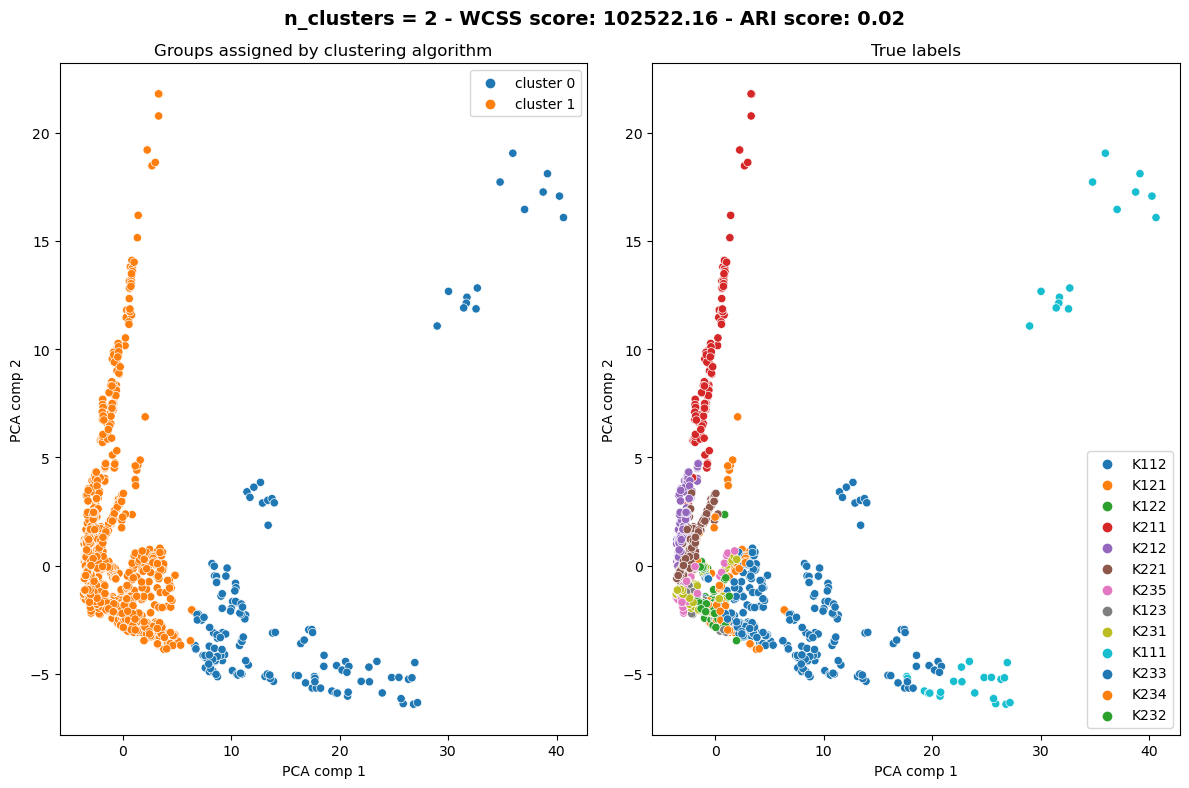

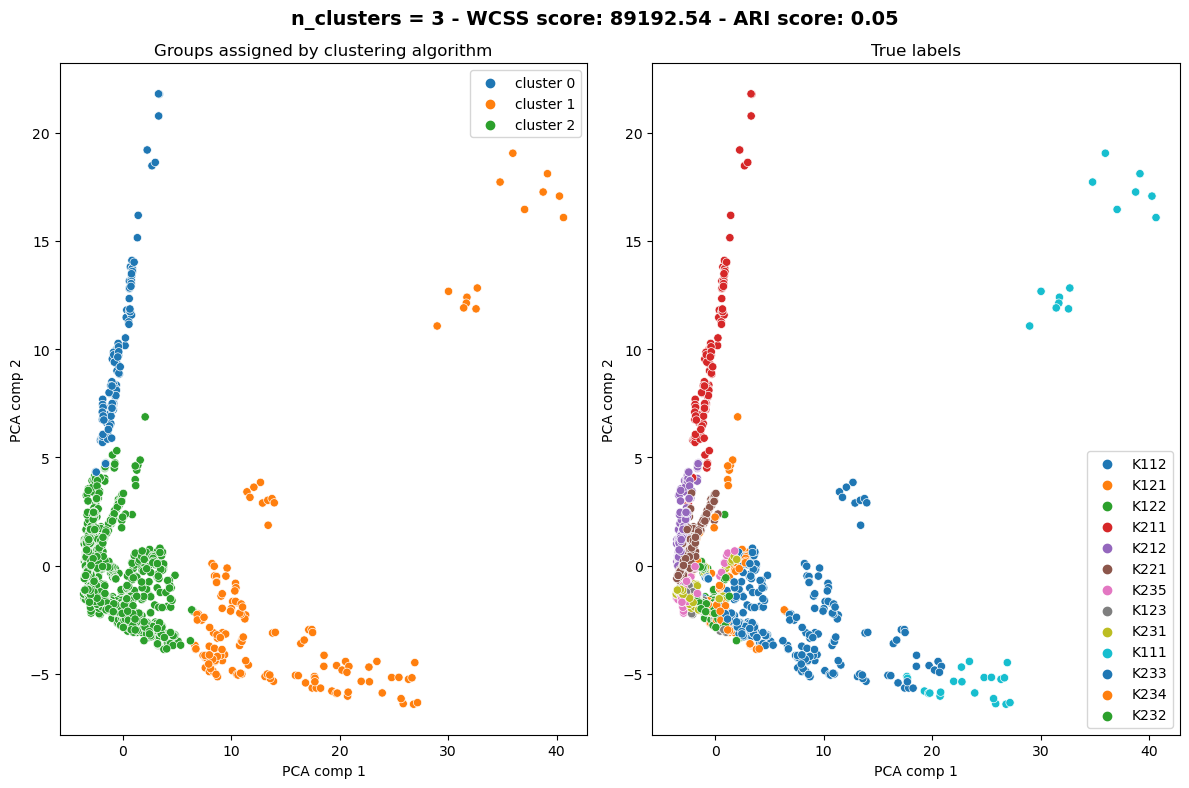

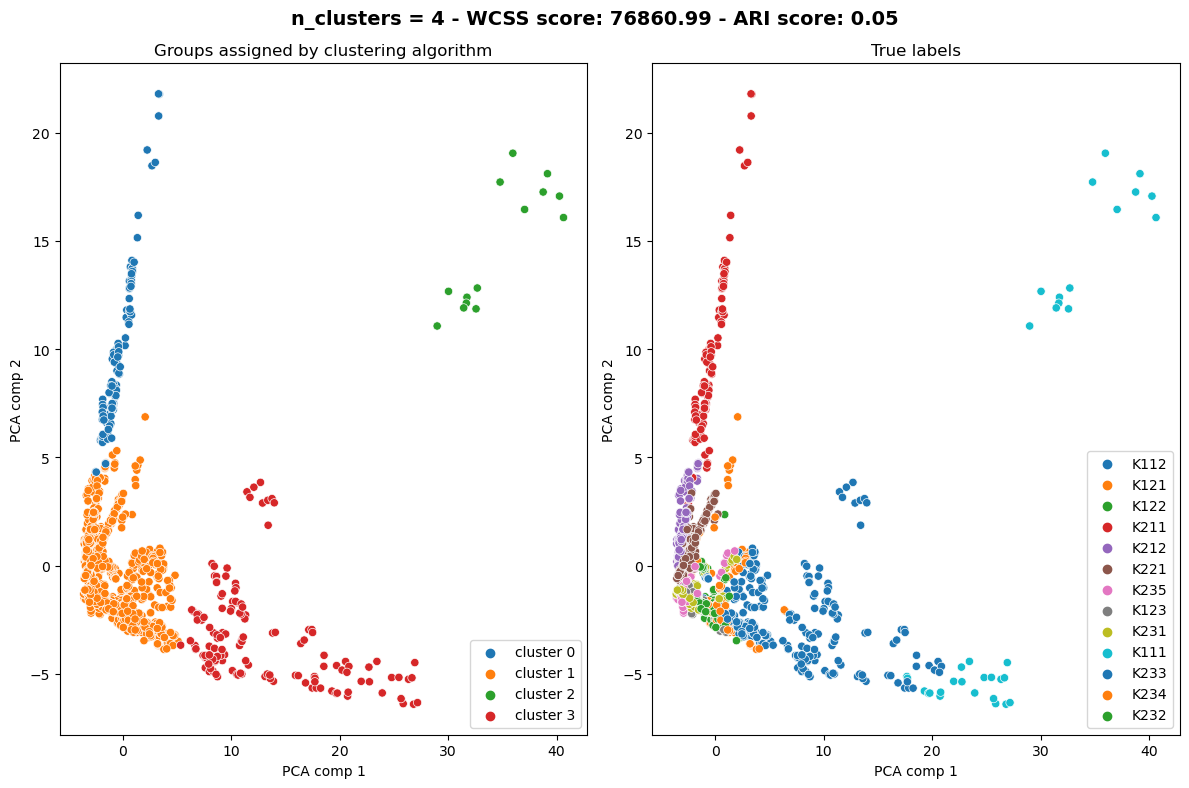

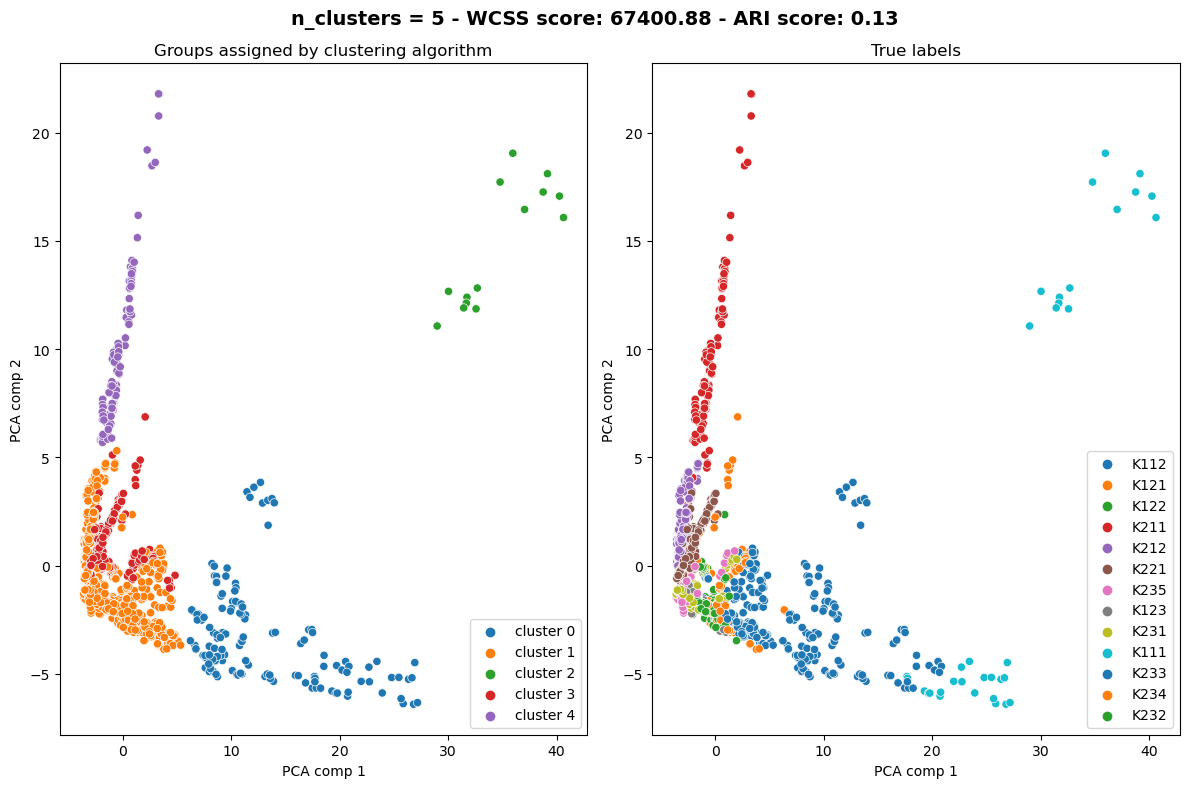

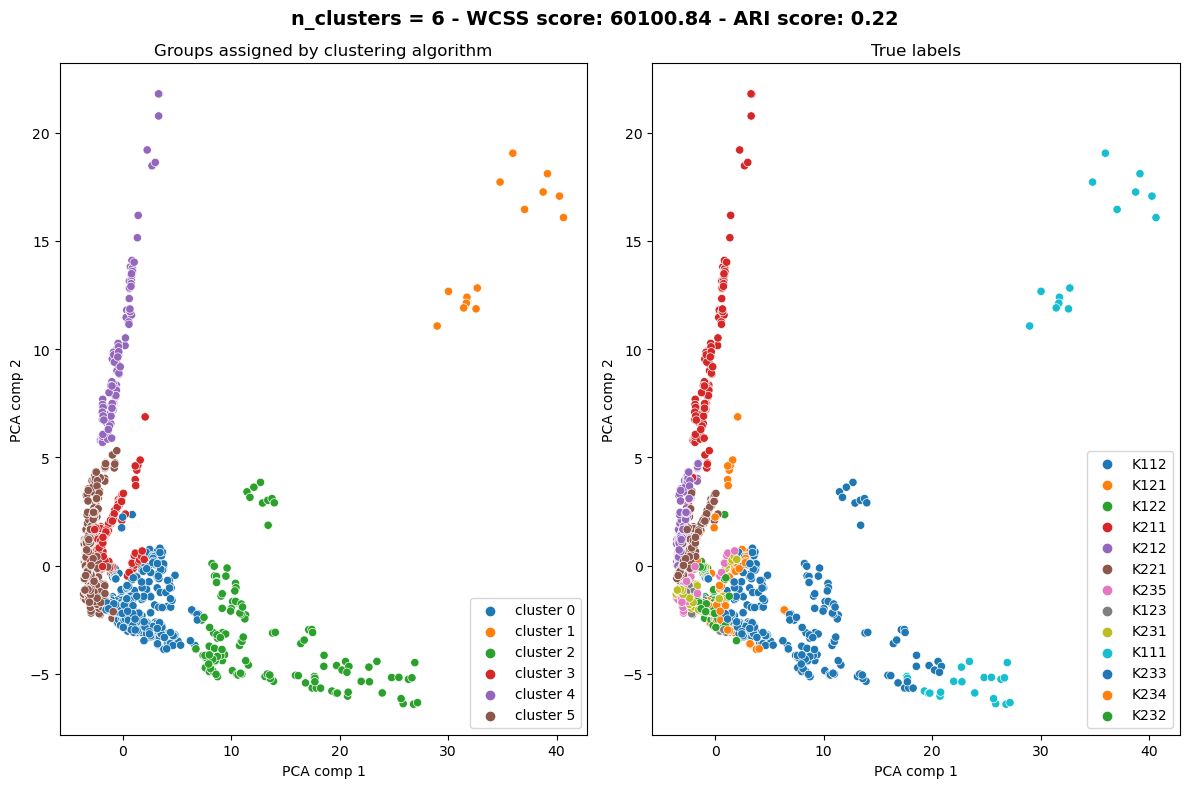

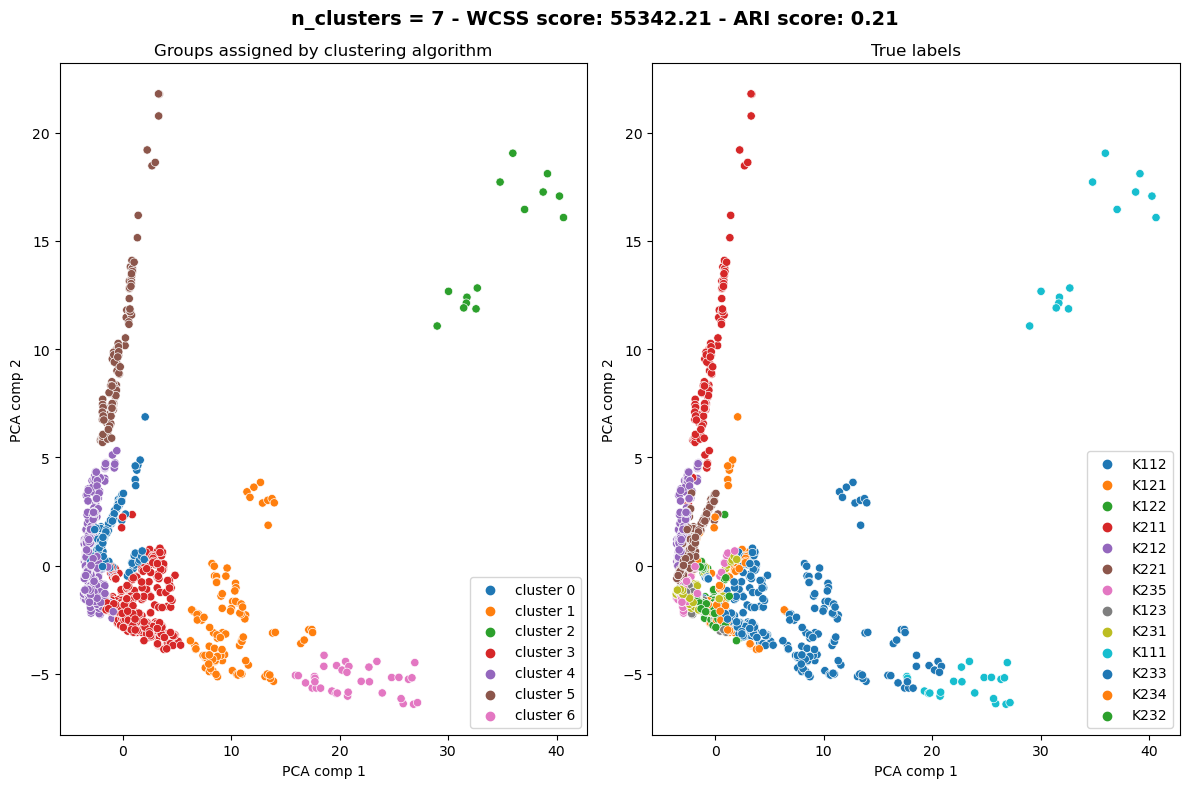

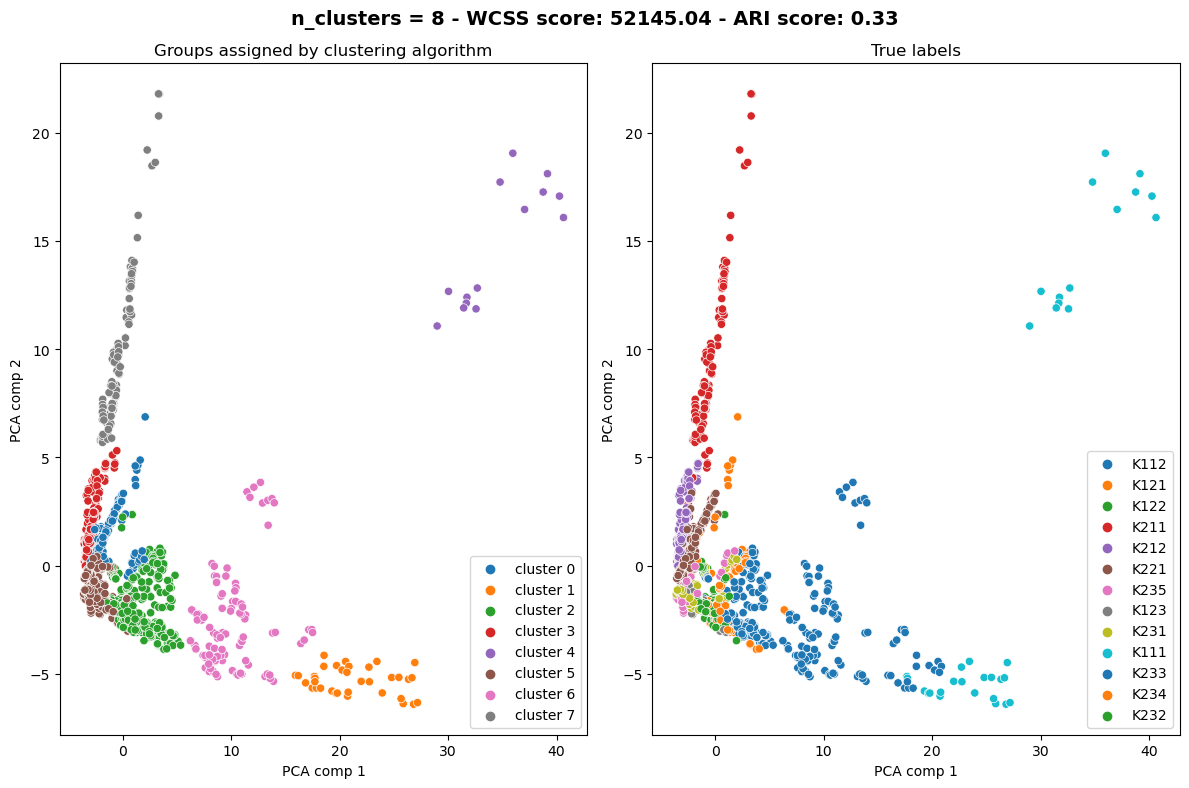

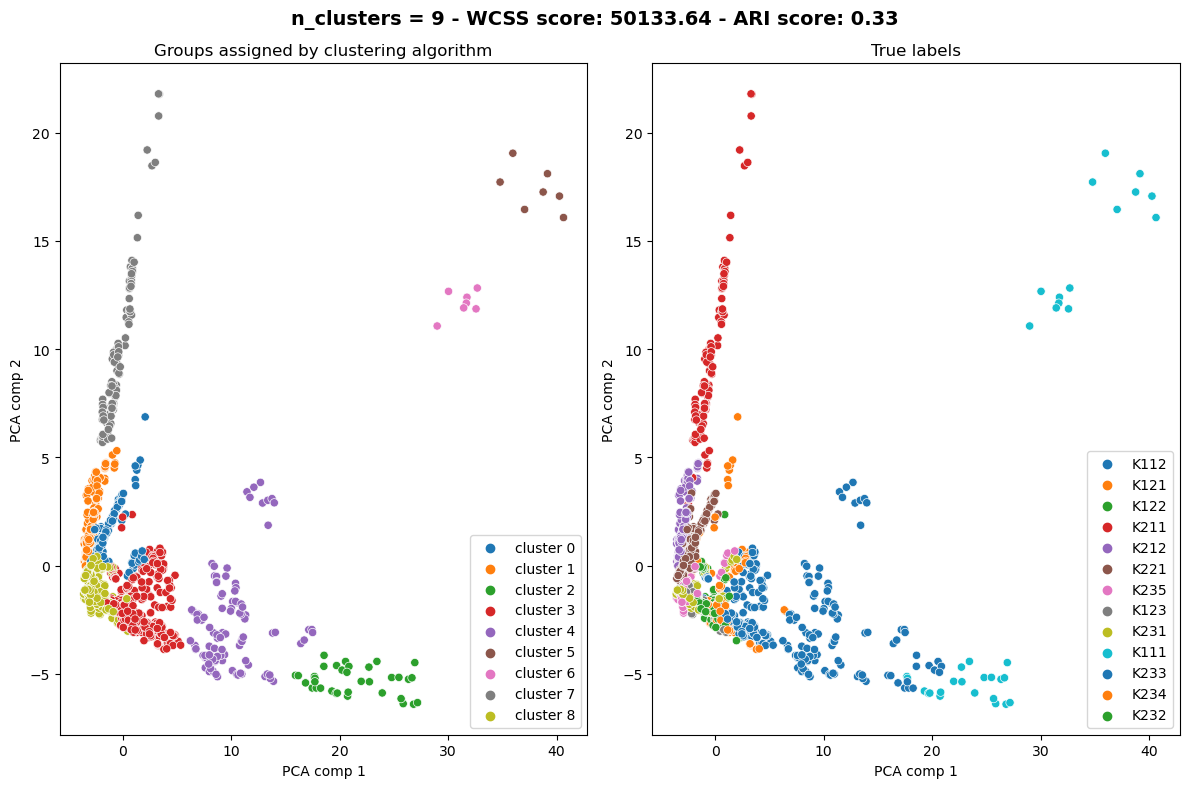

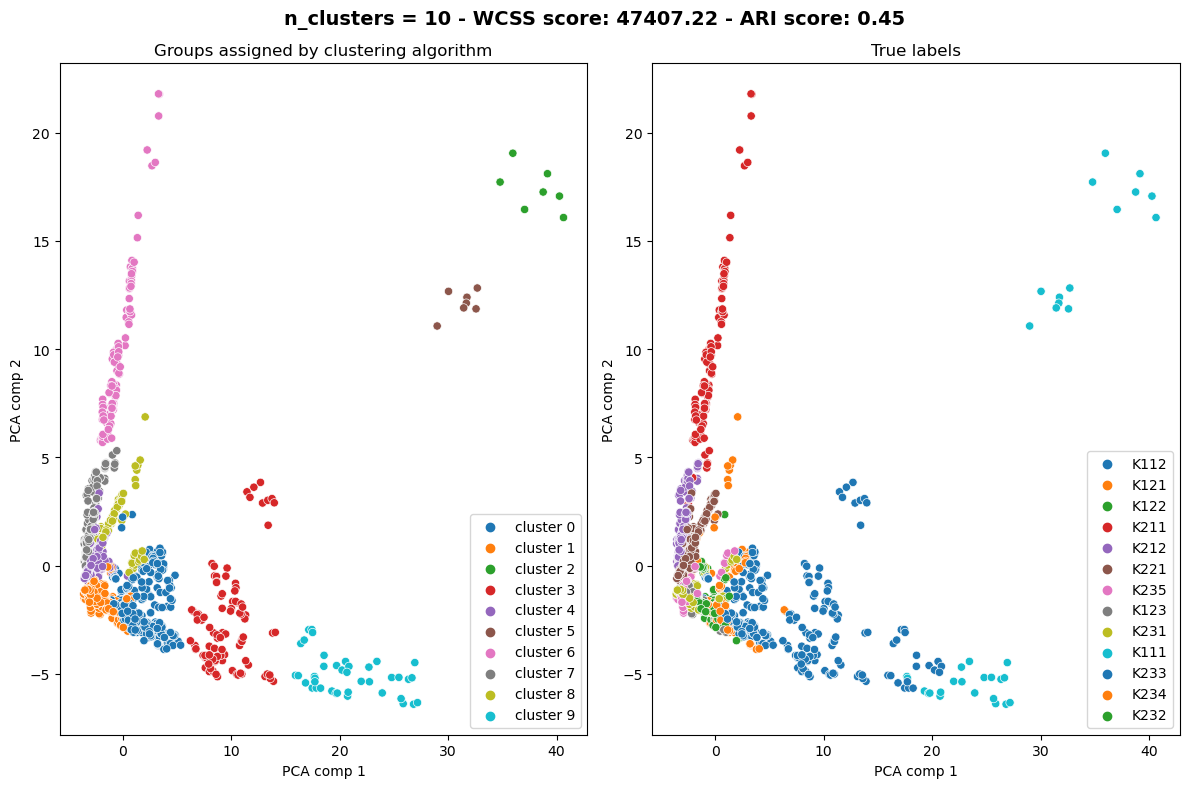

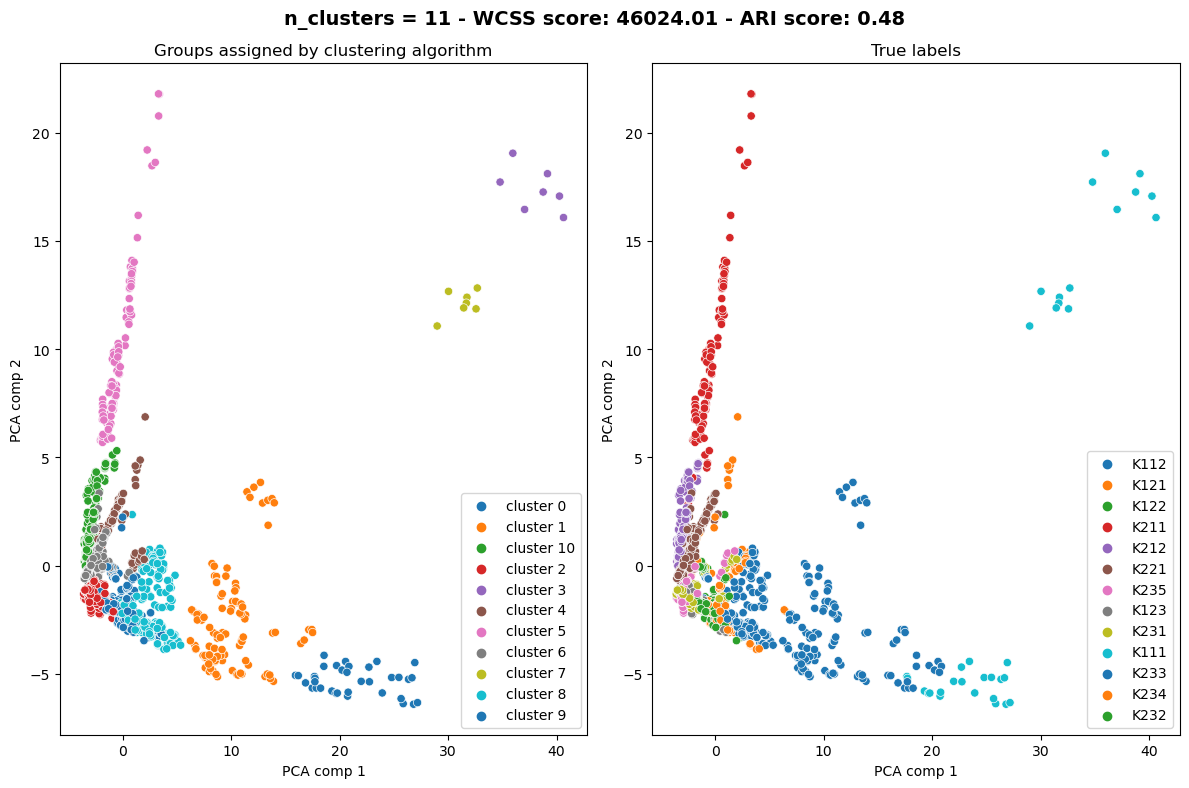

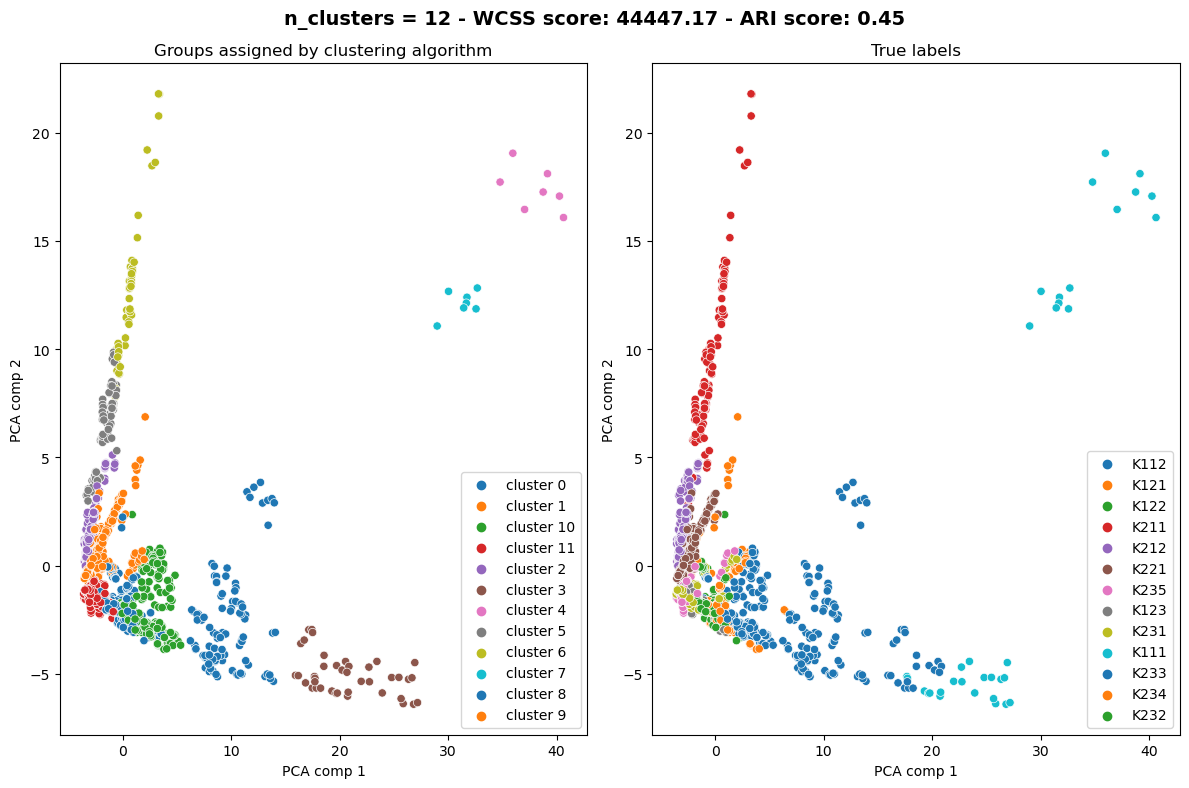

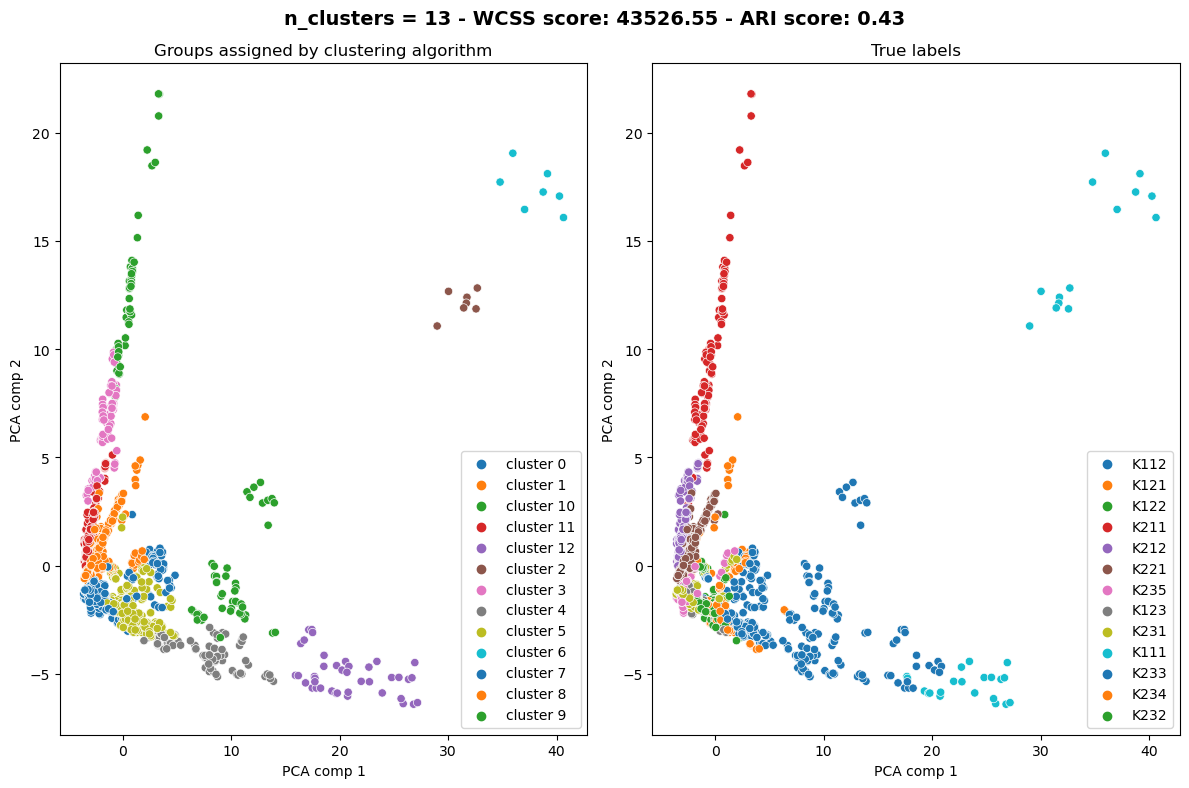

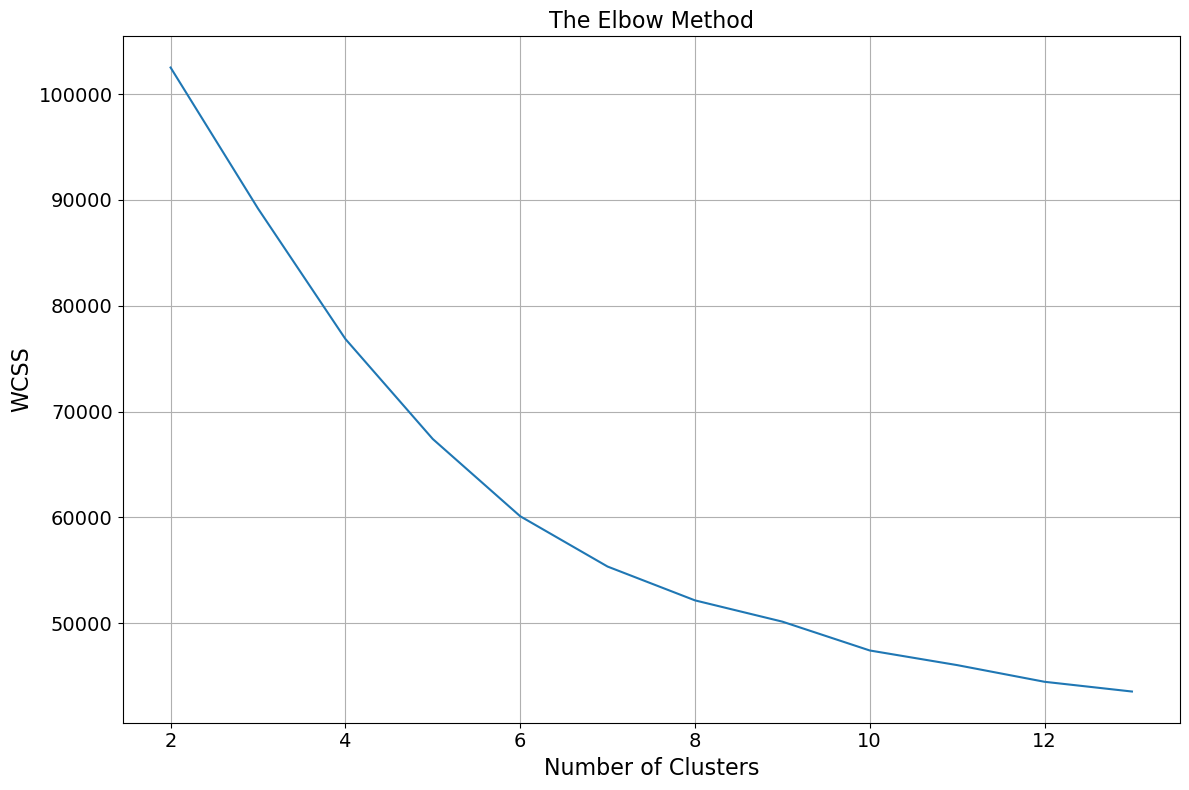

In [68]:
# maximum number of clusters you want to try
max_n_clusters = 14
# create an array that contains the different number of clusters from 2 to max_n_clusters
n_clusters = np.arange(2, max_n_clusters)

wcss, ari_scores = apply_kmeans(X, y, n_clusters)

plt.figure(figsize=(12, 8))
plt.plot(n_clusters, wcss)
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig("../output/Elbow_plot.png")


# Apply DBSCAN



In [71]:
#DBSCAN
# scores manually defined to make a search.
# Define a list for eps and min_samples parameters of DBSCAN algorithm

# Given that the dataset has 81 columns, I increased the min_samples range to reflect the dimensionality of the data.
# The values are increased to account for the dimensionality and the potential noise in the data.
# min_samples_range = [2, 3, 4, 5, 10, 20, 50]

eps_range = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0]
min_samples_range = [2, 3, 4, 5, 10, 20, 50]


# lists to store the results of the scores. Define one supervised (you know the true classes)
# and one unsupervised (you don't know the true classes) score
scores_silouhette, scores_ari, summary = apply_dbscan(X, y, eps_range, min_samples_range)

#sort summary according to silhouette and ARI
# silhouette
summary_silouhette = summary.sort_values(by = 'silouhette', ascending = False)[:5]
summary_silouhette.to_csv('../output/summary_DBSCAN_silouhette_5_best.csv')
# ARI
summary_ari = summary.sort_values(by = 'ari', ascending = False)[:5]
summary_ari.to_csv('../output/summary_DBSCAN_ari_5_best.csv')

# Best for silhouette

Optimal value of eps: 9.742946633086772
Optimal value of min_samples: 25
Silouhette score is: 0.6463535432207627


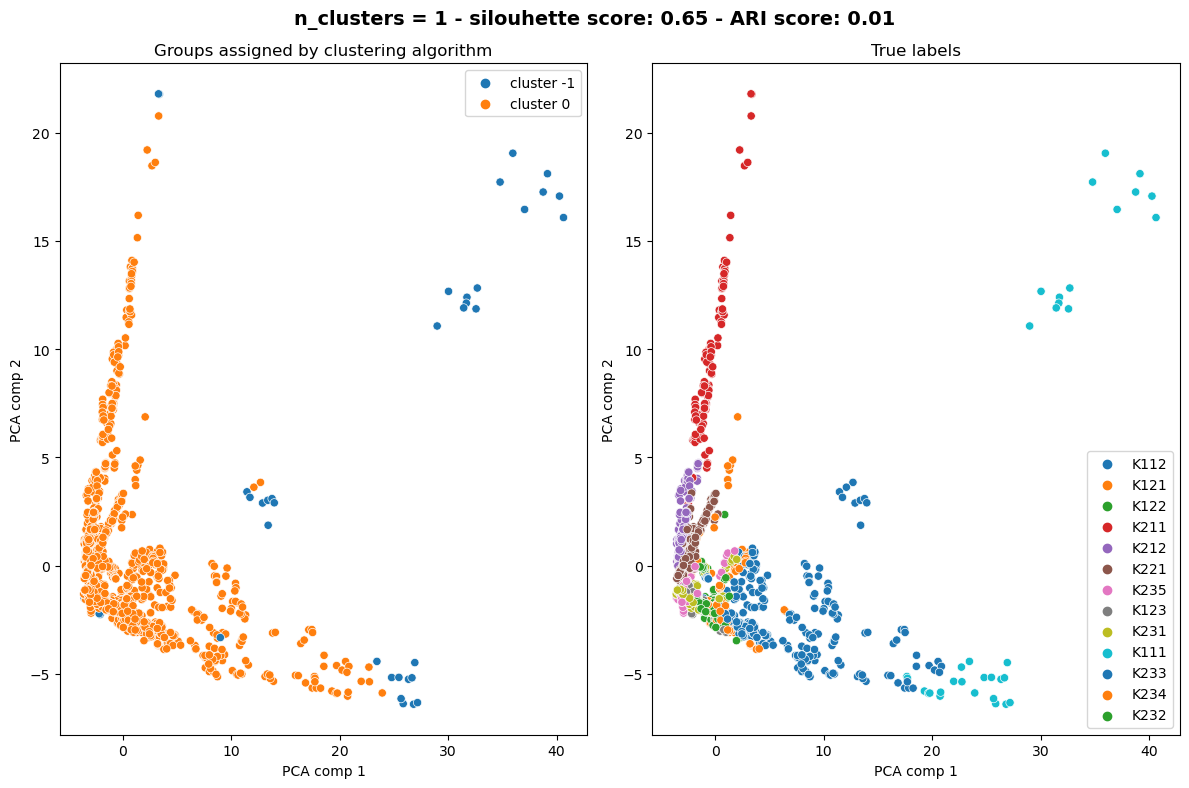

In [69]:
# extract best values for the hyperparameters according to ARI and fit again the DBSCAN with 
# the extracted best parameters
best_eps, best_min_samples, silouhette = max(scores_silouhette, key = lambda x: x[2])

print(f"Optimal value of eps: {best_eps}")
print(f"Optimal value of min_samples: {best_min_samples}")
print(f"Silouhette score is: {silouhette}")

dbscan = DBSCAN(eps = best_eps, min_samples = best_min_samples)
dbscan.fit(X)
# Calculate scores
try:
    silouhette = silhouette_score(X, dbscan.labels_)
except:
    silouhette = 0.0

ari = adjusted_rand_score(y, dbscan.labels_)
# call function to plot
plot_cluster_vs_actual_class(X, y, dbscan.labels_, "DBSCAN_silouhette", silouhette, ari)

# Best for ARI

Optimal value of eps: 3.416928496561959
Optimal value of min_samples: 21
ARI score is: 0.08338543511854792


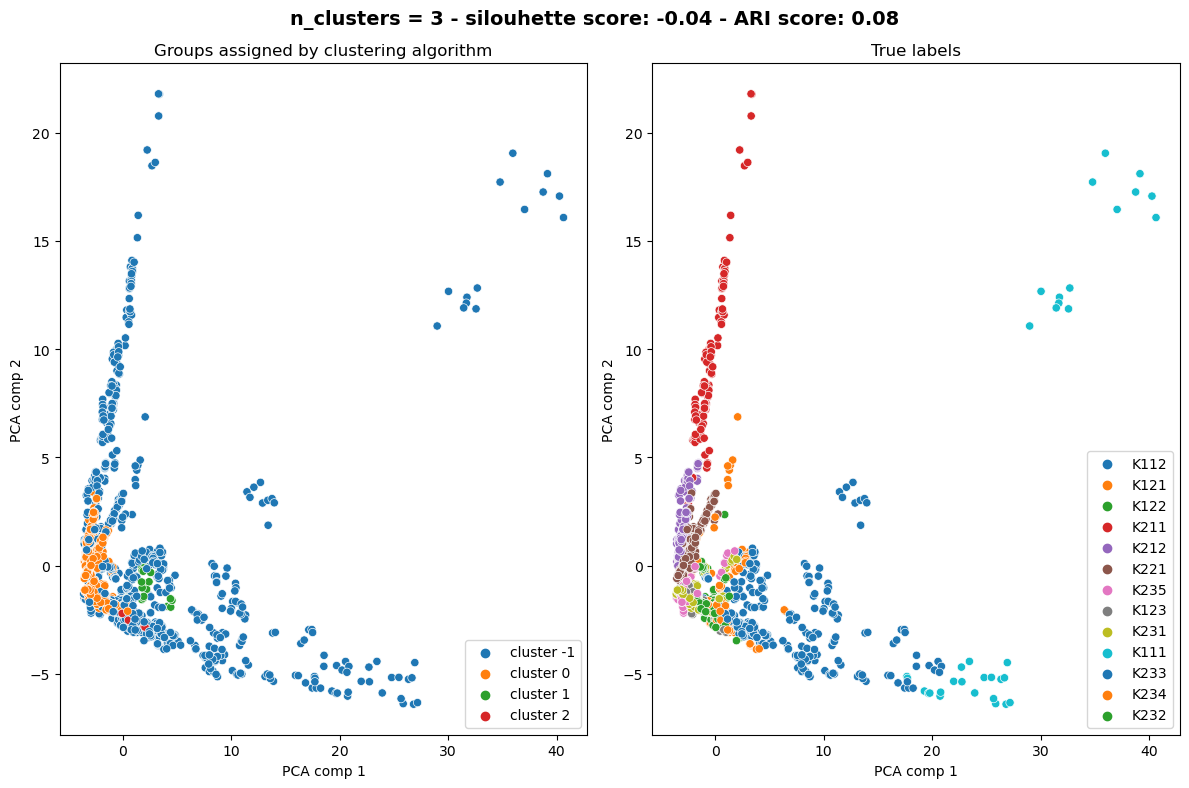

In [70]:
# extract best values for the hyperparameters according to ARI and fit again the DBSCAN with 
# the extracted best parameters
# The max() function returns the item with the highest value, 
# or the item with the highest value in an iterable. In this case
# scores ari is a list with many tuples inside. key is used to specify that
# I want the tuple where the score is the maximum (score is the value with
# index 2 in the tuple). 

best_eps, best_min_samples, ari = max(scores_ari, key = lambda x: x[2])

print(f"Optimal value of eps: {best_eps}")
print(f"Optimal value of min_samples: {best_min_samples}")
print(f"ARI score is: {ari}")

dbscan = DBSCAN(eps = best_eps, min_samples = best_min_samples)
dbscan.fit(X)
# Calculate scores
try:
    silouhette = silhouette_score(X, dbscan.labels_)
except:
    silouhette = 0.0

ari = adjusted_rand_score(y, dbscan.labels_)
# call function to plot
plot_cluster_vs_actual_class(X, y, dbscan.labels_, "DBSCAN_ARI", silouhette, ari)

# Properly initialize eps
Instead of defining the search parameters by hand you can try to have an idea of the distances among samples to initialize eps parameter which is the most important hyperparameter. You can look at the distribution of the distances of the nearest neighbors and have an idea of the range for eps parameter. You need to be consistent in choosing the metric to compute distances. If you use cosine distance in KNN you have to use cosine distance in DBSCAN.

<Figure size 640x480 with 0 Axes>

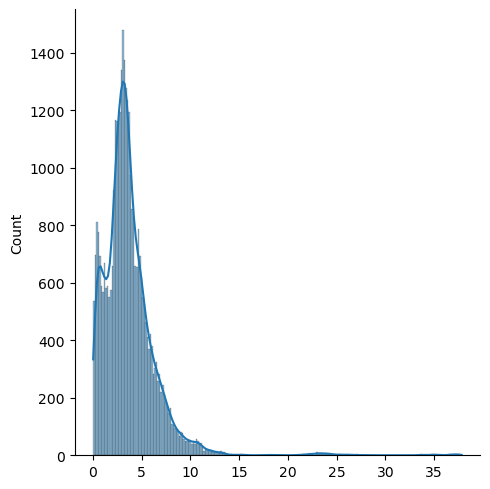

0.253919428299552 9.742946633086772
Optimal value of eps: 3.416928496561959
Optimal value of min_samples: 21
ARI score is: 0.08338543511854792


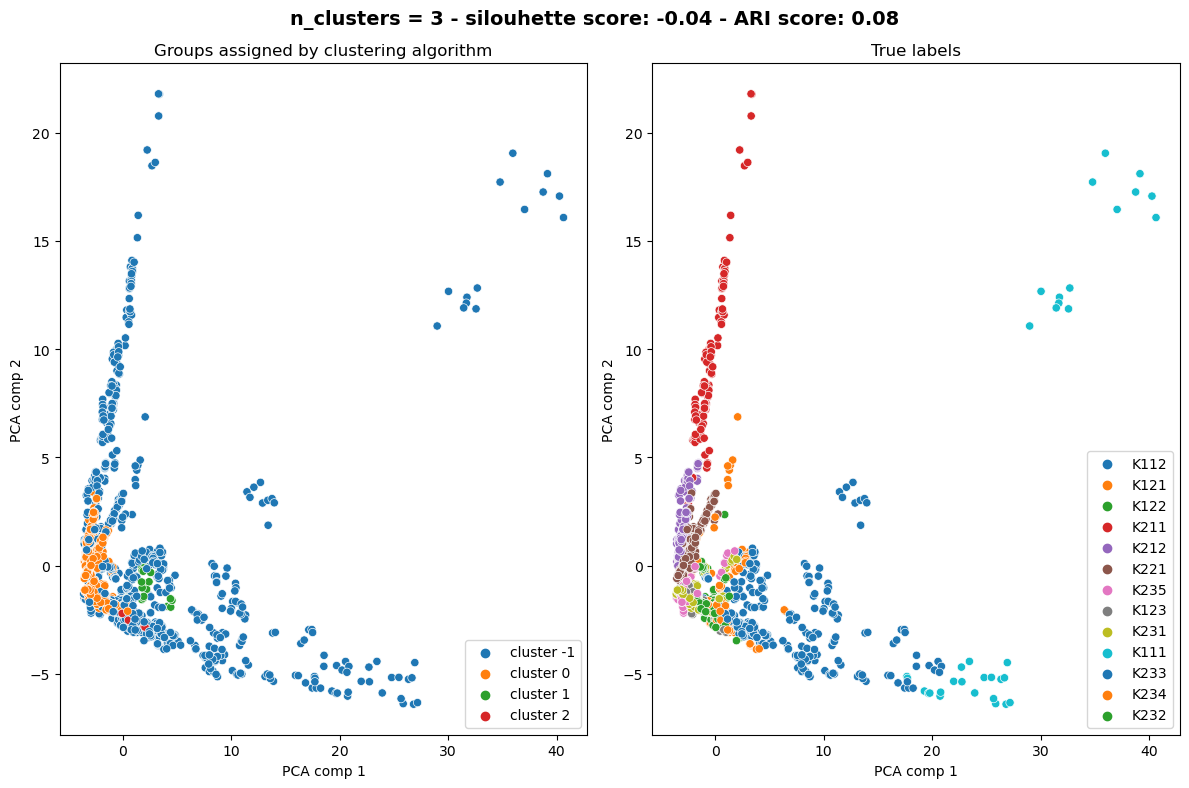

In [66]:
from sklearn.neighbors import NearestNeighbors
distance_metric = 'euclidean'

# Compute Nearest Neighbors algorithm. You can play with different number of neighbors
n_neighbors = 20
nbrs = NearestNeighbors(n_neighbors = n_neighbors, metric = distance_metric).fit(X)

# extract distances. Distances matrix has shape n_samples * n_neighbors. 
# The first column will always be zero since it is the distance of the 
# point with itself. It can return also the indices of the n nearest neighbors 
# but we don't need those for the implementation
distances, _ = nbrs.kneighbors()

plt.figure()
sns.displot(distances.flatten(), kde = True)
plt.show()
# Choose a range for eps given the avg distance
# Why do we take the distance from 1 and not from 0?
avg_dist = np.mean(distances[:, 1:]) 
# Choose 10 values for eps between 2.5 and 97.5 percentiles.
# Have a look at linspace function in numpy
low, high = np.percentile(distances.flatten(), [2.5, 97.5])
print(low, high)
eps_range = np.linspace(low, high, 10)
min_samples_range = np.linspace(n_neighbors, 2 * n_neighbors, 20, dtype = int)

# TODO: apply the function defined as apply_dbscan to apply DBSCAN 
scores_silouhette, scores_ari, summary = apply_dbscan(X, y, eps_range, min_samples_range)

# Extract best values for the hyperparameters and use those to perform the final clustering. Then 
# compute the performnace metrics (both unsupervised and supervised)
# Calculate scores
# As in the function -> check how many clusters the algorithm found

best_eps, best_min_samples, ari = max(scores_ari, key = lambda x: x[2])

print(f"Optimal value of eps: {best_eps}")
print(f"Optimal value of min_samples: {best_min_samples}")
print(f"ARI score is: {ari}")
dbscan = DBSCAN(eps = best_eps, min_samples = best_min_samples)
dbscan.fit(X)
# Calculate scores
try:
    silouhette = silhouette_score(X, dbscan.labels_)
except:
    silouhette = 0.0

ari = adjusted_rand_score(y, dbscan.labels_)
# call function to plot
plot_cluster_vs_actual_class(X, y, dbscan.labels_, "DBSCAN_ARI", silouhette, ari)